In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
import matplotlib
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import export_graphviz  
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale, minmax_scale, robust_scale

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font', family='AppleGothic')

matplotlib.rc('axes', unicode_minus = False)
from scipy.stats import chi2_contingency
from scipy import stats

from statsmodels.api import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

# cooking

In [79]:
cook = pd.read_csv("cooking_new.csv",encoding='euc-kr')
cook.rename(columns = {'불량여부':'불량'},inplace=True)
cook.rename(columns = {'발생시간파생':'오류시간클래스'},inplace=True)
cook.rename(columns = {'오류발생작업장명':'작업장'},inplace=True)
cook.head()

,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,...,생산시간,생산일자,불량,발생시간,오류시간클래스,종료시간,오류조치시간,비가동코드,Error_Message,작업장
0,3,C001,쿠커 #1,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,...,70.37,2021-01-03,양품,0,0,0,0.0,0,0,0
1,1,C002,쿠커 #2,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,...,70.83,2021-01-03,양품,0,0,0,0.0,0,0,0
2,13,C003,쿠커 #3,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,...,73.55,2021-01-03,양품,0,0,0,0.0,0,0,0
3,7,C005,2동 쿠커 #4,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,...,74.81,2021-01-03,양품,0,0,0,0.0,0,0,0
4,2,C007,프리머 #1,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179318,114.079318,149.928068,23.899,...,73.40,2021-01-03,양품,0,0,0,0.0,0,0,0


In [80]:
cook['오류시간클래스'] = cook['오류시간클래스'].astype('str')

In [25]:
def time(row):
    if pd.isnull(row):
        return row
    
    if row == '1' or row == '2' or row == '3' or row == '4':
        return '1~4'
    
    elif row == '5' or row == '6' or row == '7' or row == '8':
        return '5~8'
    
    elif row == '9' or row == '10' or row == '11' or row == '12':
        return '9~12'
    
    elif row == '13' or row == '14' or row == '15' or row == '16':
        return '13~16'
    
    elif row == '17' or row == '18' or row == '19' or row == '20':
        return '17~20'
    
    elif row == '21' or row == '22' or row == '23' or row == '24':
        return '21~24'
    
    
cook['오류시간클래스'] = cook['오류시간클래스'].apply(time)

In [6]:
cook['오류시간클래스'].value_counts()

9~12     272
13~16    263
17~20    175
5~8      148
21~24    125
1~4       89
Name: 오류시간클래스, dtype: int64

## 제품군 범주화

In [81]:
def func1(row):
    if pd.isnull(row):
        return row
    
    if '소스' in row:
        return 'sauce'
    elif '드레싱' in row :
        return 'sauce'
    elif '마요네즈' in row :
        return 'sauce'
    elif '마요' in row :
        return 'rice'
    elif '밥' in row :
        return 'rice'
    elif '비빔밥' in row :
        return 'rice'
    elif '라이스' in row :
        return 'rice'
    elif '볶음밥' in row :
        return 'rice'
    elif '볶음' in row :
        return 'rice'
    elif '볶음' in row :
        return 'rice'
    elif '도시락' in row:
        return 'rice'
    elif '샐러드' in row:
        return 'salad'
    elif '베이스' in row:
        return 'soup'
    elif '국물' in row:
        return 'soup'
    elif '양념' in row:
        return 'sauce'
    elif '허브' in row:
        return 'sauce'
    elif '디핑' in row:
        return 'sauce'  
    elif '이마트 야채케' in row:
        return 'sauce'  
    elif '케찹' in row:
        return 'sauce'
    elif '참치액' in row:
        return 'sauce'  
    elif '시럽' in row:
        return 'sauce'  
    elif '머스타드' in row:
        return 'sauce'  
    elif '에이드' in row:
        return 'drink'
    elif '머스타드' in row:
        return 'sauce'
    elif '요리당' in row:
        return 'sauce'
    elif '멸치' in row:
        return 'soup'
    elif '감자무스' in row:
        return 'salad'
    elif '머스타드' in row:
        return 'sauce'
    elif '사골' in row:
        return 'soup'
    elif '사이다' in row:
        return 'drink'
    elif '쉐프메이드' in row:
        return 'sauce'
    elif '사골' in row:
        return 'soup'
    elif '사우전아일랜드' in row:
        return 'sauce'
    elif '데미그라스' in row:
        return 'sauce'
    elif '육수' in row:
        return 'soup'
    elif 'SAUCE' in row:
        return 'sauce'
    elif '다시' in row:
        return 'soup'
    elif '수프' in row:
        return 'soup'
    elif '초고추장' in row:
        return 'sauce'
    elif '리조또' in row:
        return 'rice'
    elif '깔라만시' in row:
        return 'sauce'
    elif '케첩' in row:
        return 'sauce'
    elif '죽' in row:
        return 'rice'
    elif '데리야끼' in row:
        return 'sauce'
    
cook['구분'] = cook['품목명'].apply(func1)

In [82]:
cook.구분.unique()

array(['sauce', 'salad', 'soup', 'drink', None, 'rice'], dtype=object)

In [84]:
# 오류발생작업장명 변환 ['충전실','쿠킹실','포장실','계량실'] 
cook['작업장'] = cook['작업장'].replace('충전실', '충전').replace('쿠킹실', '쿠킹').replace('포장실','포장').replace('계량실','계량')

In [83]:
cook['불량'] = cook['불량'].replace('불량', 1).replace('양품', 0)

len_p1=cook.groupby('구분')['구분'].count()
len_p1=pd.DataFrame(len_p1)
len_p1.rename(columns={'구분':'개수'},inplace=True)
len_p1.reset_index(inplace=True)
len_p1


,구분,개수
0,drink,35
1,rice,10101
2,salad,1093
3,sauce,11529
4,soup,833


In [85]:
p1 = cook.pivot_table(index='구분' , values= '불량', aggfunc='sum').reset_index()
p1['비율'] = p1['불량'] / len_p1['개수']
p1

,구분,불량,비율
0,drink,2,0.057143
1,rice,455,0.045045
2,salad,53,0.048490
3,sauce,513,0.044496
4,soup,35,0.042017


## 전체 생산건수중의 해당 품목의 "생산 비율" 
소스: 0.501553 ,
rice :0.412029

In [86]:
sum_=sum(len_p1['개수'])
len_p1['각품목의생산비율']=len_p1['개수']/sum_
len_p1


,구분,개수,각품목의생산비율
0,drink,35,0.001484
1,rice,10101,0.428172
2,salad,1093,0.046331
3,sauce,11529,0.488703
4,soup,833,0.035310


## 전체 불량건수중에서 소스랑 라이스가 차지하는 비율

In [32]:
p1 = cook.pivot_table(index='구분' , values= '불량', aggfunc='sum').reset_index()
p1['비율'] = p1['불량'] / len_p1['개수']
p1

,구분,불량,비율
0,drink,2,0.057143
1,rice,455,0.045045
2,salad,53,0.048490
3,sauce,513,0.044496
4,soup,35,0.042017


# 전체 불량 건수중의 품목별로 얼마나 불량비율을 차지
전체불량중 소스가 차지하는 불량 비율: 0.499519  
전체불량중 rice가 차지하는 불량 비율: 0.411935

In [33]:
#전체불량갯수중에 각 구분별 불량률 = 비율_전체불량개수
sum_all=sum(p1['불량'])
sum_all

p1['비율_전체불량개수']=p1['불량']/sum_all
p1

,구분,불량,비율,비율_전체불량개수
0,drink,2,0.057143,0.001890
1,rice,455,0.045045,0.430057
2,salad,53,0.048490,0.050095
3,sauce,513,0.044496,0.484877
4,soup,35,0.042017,0.033081


In [34]:
cook.fillna(0,inplace=True)

In [35]:
cook.to_csv("Cooking.csv",index= False ,encoding= 'euc-kr')

In [21]:
cook

,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,...,생산일자,불량,발생시간,오류시간클래스,종료시간,오류조치시간,비가동코드,Error_Message,작업장,구분
0,3,C001,쿠커 #1,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,...,2021-01-03,0,0,0,0,0.0,0,0,0,sauce
1,1,C002,쿠커 #2,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,...,2021-01-03,0,0,0,0,0.0,0,0,0,salad
2,13,C003,쿠커 #3,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,...,2021-01-03,0,0,0,0,0.0,0,0,0,soup
3,7,C005,2동 쿠커 #4,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,...,2021-01-03,0,0,0,0,0.0,0,0,0,salad
4,2,C007,프리머 #1,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179318,114.079318,149.928068,23.899,...,2021-01-03,0,0,0,0,0.0,0,0,0,sauce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23967,7,D087,냉동밥 내포장#2,1BA03638,(1)Homeplus signature 날치알이톡톡터지는날치알밥(알밥),W005,70.610616,103.710616,138.257466,23.031,...,2021-10-28,1,14:15,13~16,14:35,20.0,W005722,공정 과부하,충전,rice
23968,9,D088,냉동밥 내포장#1,1BA03515,(쿠팡)곰곰갈비맛치킨밥,W005,69.732381,98.432381,133.916831,23.656,...,2021-10-29,0,0,0,0,0.0,0,0,0,rice
23969,10,D088,냉동밥 내포장#1,1BA03612,무명식당뿌리채소영양밥3kg,W005,71.459932,107.559932,143.598182,24.026,...,2021-10-29,0,0,0,0,0.0,0,0,0,rice
23970,4,D088,냉동밥 내포장#1,1BA03606,콩콩푸드밥3kg,W005,70.664452,65.764452,100.773102,23.339,...,2021-10-29,0,0,0,0,0.0,0,0,0,rice


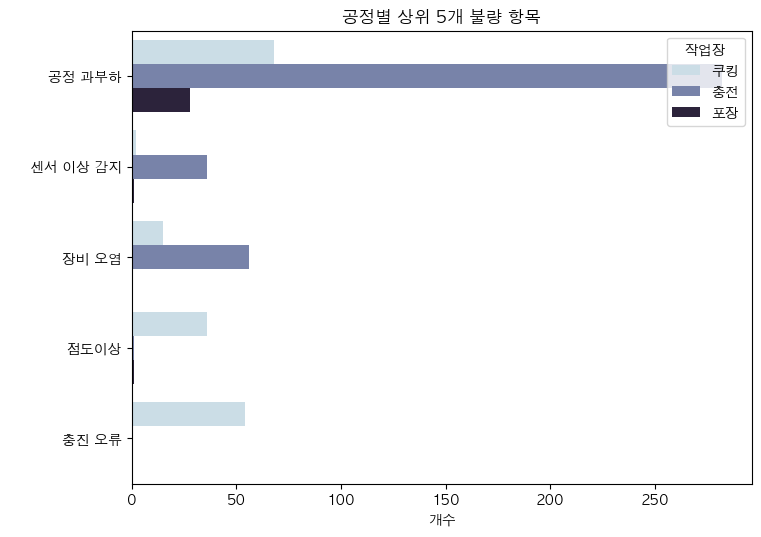

In [99]:
index1 = cook[cook['Error_Message'] == '기타'].index
cook.drop(index1,inplace=True)

index2 = cook[cook['Error_Message'] == '0'].index
cook.drop(index2,inplace=True)

top_list = cook['Error_Message'].value_counts().nlargest(5).index
df_top = cook[cook['Error_Message'].isin(top_list)]
df_top = df_top.sort_values(by='Error_Message')

plt.figure(figsize = (8,6),dpi = 100)
cnt=sns.countplot(y = 'Error_Message',hue='작업장',data = df_top, palette='ch:s=.25,rot=-.25')
cnt.set_xlabel("개수")
cnt.set_ylabel(" ")
plt.title('공정별 상위 5개 불량 항목')
plt.show()

## 데이터 분리

- ncook : sauce 전체 데이터 
- decook : sauce 불량 데이터

-----


- ncook2 : rice 전체 데이터 
- decook2 : rice 불량 데이터

## Sauce

In [36]:
ncook = cook[['구분','품목명','생산일자','충전실온도','실링온도','실링압력','쿠킹온도','쿠킹스팀압력','불량','오류시간클래스','오류조치시간','Error_Message','작업장']]
ncook.head()

,구분,품목명,생산일자,충전실온도,실링온도,실링압력,쿠킹온도,쿠킹스팀압력,불량,오류시간클래스,오류조치시간,Error_Message,작업장
0,sauce,서비스면양념장(재),2021-01-03,71.669853,96.769853,201.844,131.742003,23.315,0,0,0.0,0,0
1,salad,고구마샐러드믹스베이스(재),2021-01-03,70.386480,102.086480,212.043,136.926080,23.226,0,0,0.0,0,0
2,soup,이마트가쓰오다시국물(재),2021-01-03,71.206130,112.306130,208.781,147.579680,23.516,0,0,0.0,0,0
3,salad,고구마샐러드바145g(재),2021-01-03,70.430565,96.030565,208.269,131.569165,23.692,0,0,0.0,0,0
4,sauce,이츠웰골드마요네즈1kg(재),2021-01-03,72.179318,114.079318,211.625,149.928068,23.899,0,0,0.0,0,0


In [37]:
lenp = ncook.groupby('구분')['구분'].count()
lenp

구분
0          381
drink       35
rice     10101
salad     1093
sauce    11529
soup       833
Name: 구분, dtype: int64

In [39]:
ncook.groupby('품목명')['품목명'].value_counts().nlargest(5)

품목명                  품목명                
게살볶음밥E               게살볶음밥E                 362
골드마요네즈3.2kg          골드마요네즈3.2kg            309
쉐프솔루션베이스볶음밥(시즌)500g  쉐프솔루션베이스볶음밥(시즌)500g    252
비비고불고기비빔밥200g        비비고불고기비빔밥200g          239
비비고새우볶음밥210g(알밥)     비비고새우볶음밥210g(알밥)       230
Name: 품목명, dtype: int64

In [38]:
decook = ncook[ncook['불량'] == 1]
decook.groupby('품목명')['품목명'].value_counts().nlargest(5)

품목명               품목명             
게살볶음밥E            게살볶음밥E              16
김치볶음밥-S           김치볶음밥-S             15
참깨흑임자드레싱          참깨흑임자드레싱            15
비비고깍두기볶음밥200g(재)  비비고깍두기볶음밥200g(재)    13
비비고불고기비빔밥200g     비비고불고기비빔밥200g       12
Name: 품목명, dtype: int64

## Sauce 불량/양품 개수

Text(0.5, 1.0, 'SAUCE 불량/양품 개수')

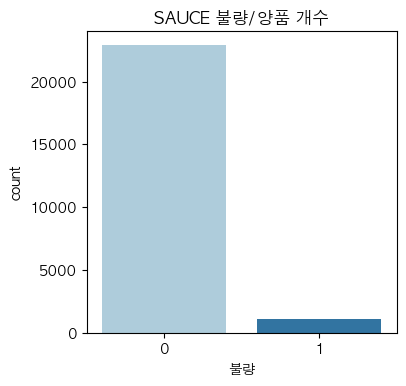

In [40]:
palette = sns.color_palette('Paired',9)
fig, ax = plt.subplots(figsize = (4,4),dpi=100)

sns.countplot(ncook['불량'],palette=palette)
plt.title('SAUCE 불량/양품 개수')

## 요인별 Histogram

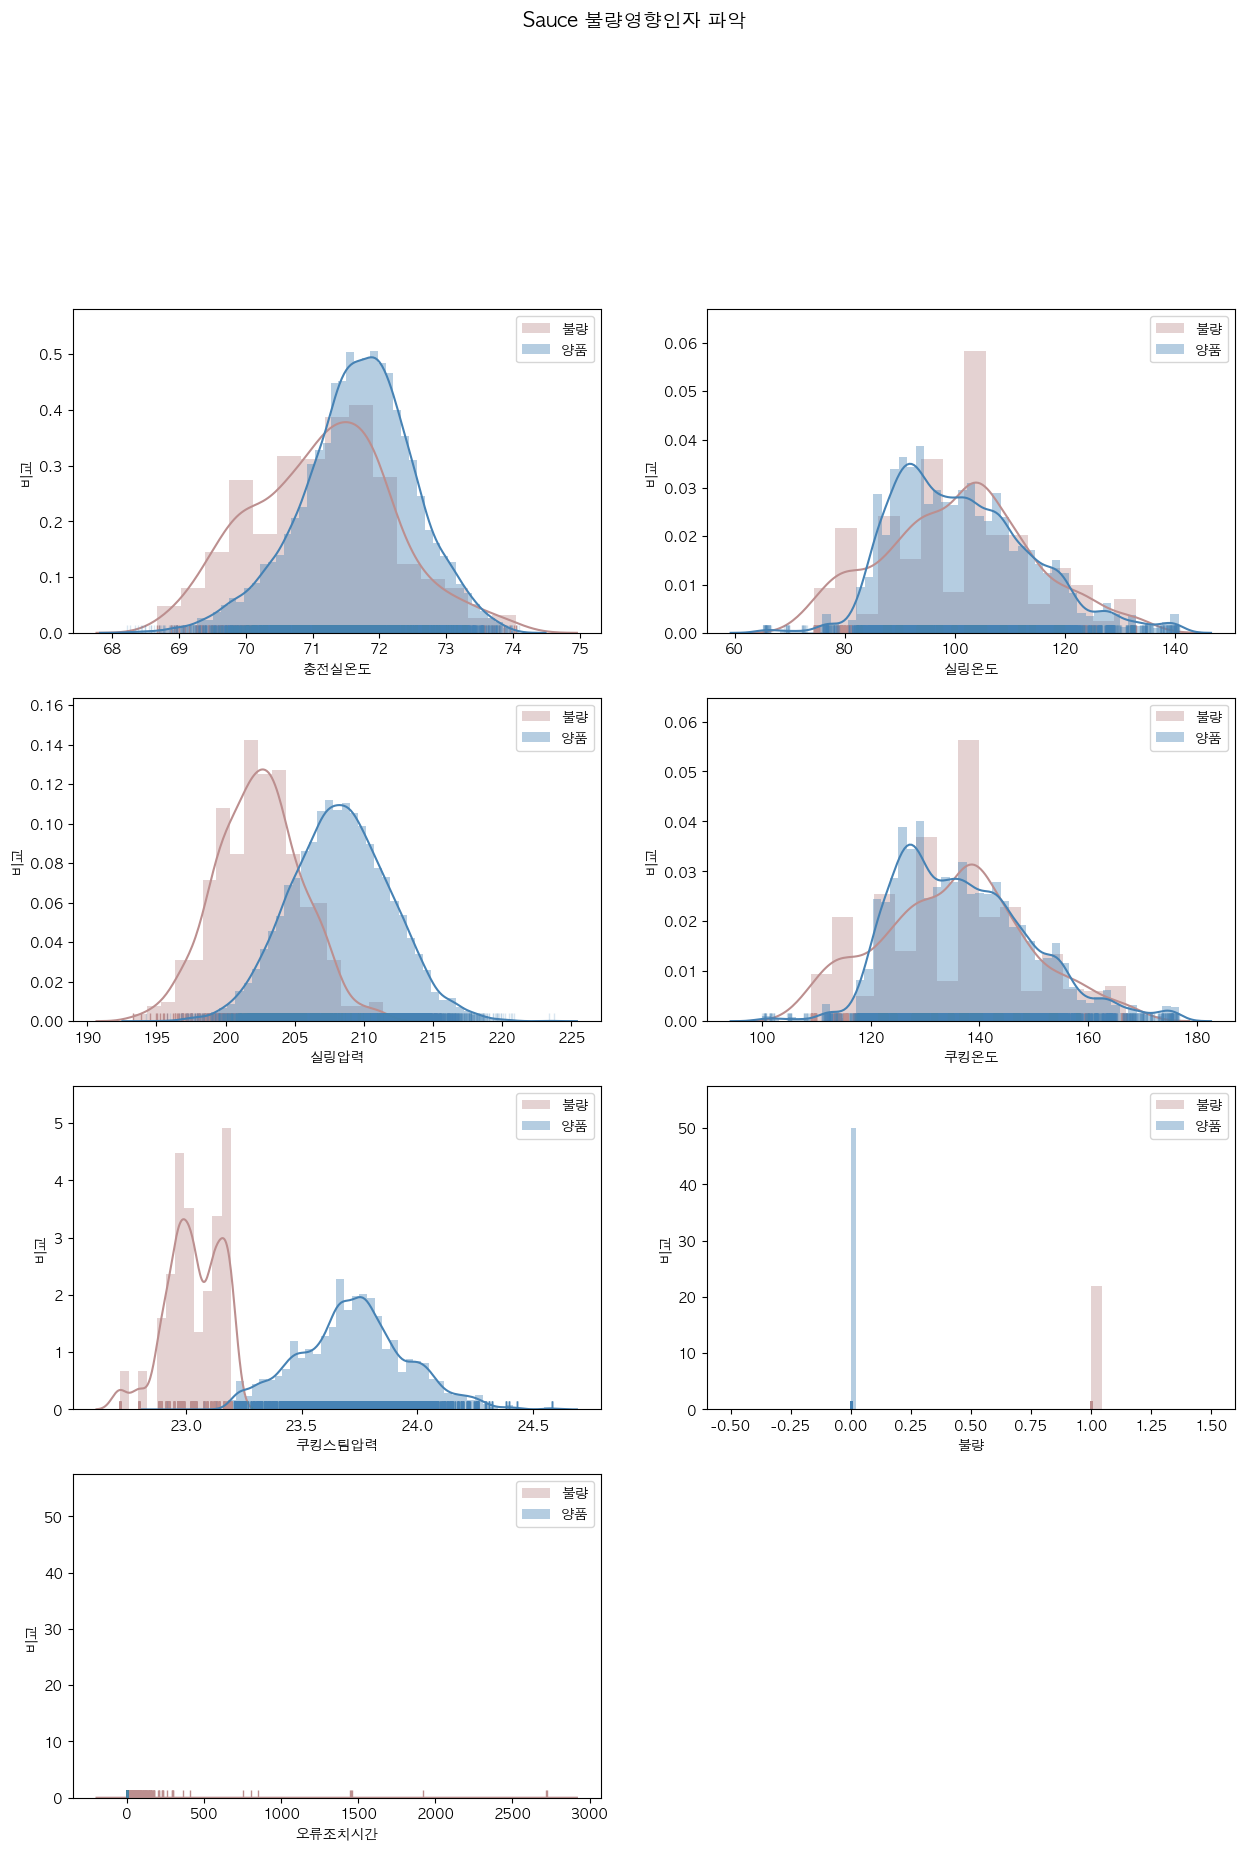

In [159]:
ncook = ncook[ncook['구분'] == 'sauce']
decook = ncook[ncook['불량'] == 1]
ncook

df_numeric = ncook.select_dtypes(exclude = 'object')
df_numeric_x = df_numeric.drop("불량", axis = 1)
df_numeric_y = df_numeric["불량"]
df_numeric_x.head()

i = 0
columns = df_numeric.columns
palette = sns.color_palette('Paired',9)

fig = plt.figure(figsize = (15, 30),dpi=100)

for col in df_numeric.columns: 
    plt.subplot(ncook.shape[1]//2, 2, i+1)
    i += 1
    sns.distplot(ncook[ncook["불량"] == 1][col], label = "불량", color='rosybrown',kde=True,rug=True,rug_kws={'alpha':1})
    sns.distplot(ncook[ncook["불량"] == 0][col], label = "양품",color='steelblue',kde=True,rug=True,rug_kws={'alpha':0.2})
    
    
    plt.xlabel(col)
    plt.ylabel("비교")
    plt.legend()
    plt.suptitle('Sauce 불량영향인자 파악',fontsize=14)
plt.show()

## Sauce 작업장 별 불량률

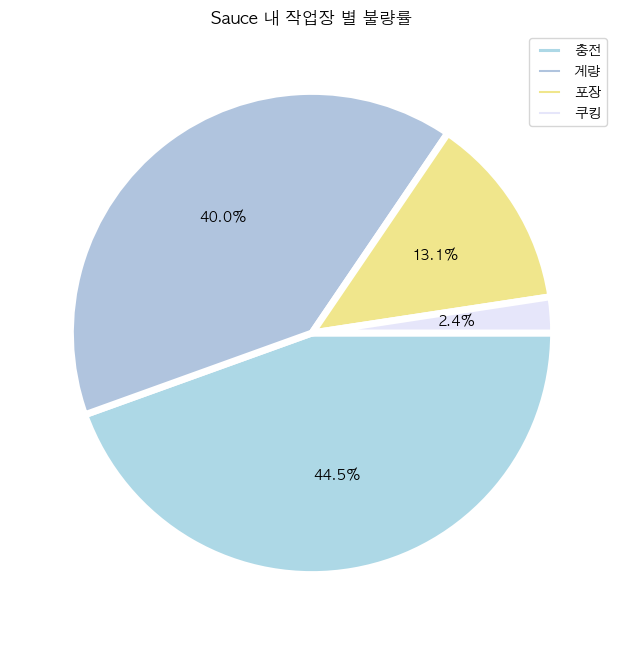

In [41]:
dfcount = decook.groupby('작업장', as_index = False).agg("count")
labels = dfcount["작업장"]
colors = ['lightblue', 'lightsteelblue','khaki','lavender']
 

labels = ['충전','계량','포장','쿠킹',] ## 라벨
frequency = [44.5,40,13.1,2.4] ## 빈도
wedgeprops={'width': 1, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(15,8),dpi=100) 
fig.set_facecolor('white') 
ax = fig.add_subplot()
 
pie = ax.pie(frequency,
       counterclock=False, 
       autopct=lambda p : '{:.1f}%'.format(p),
       colors =colors,
       wedgeprops=wedgeprops
       )
 
plt.legend(pie[0],labels) 
plt.title('Sauce 내 작업장 별 불량률')
plt.show()

## Sauce 불량, 오류 발생시각

<AxesSubplot:title={'center':'SAUCE 불량이 발생하는 시간'}, xlabel='오류시간클래스', ylabel='count'>

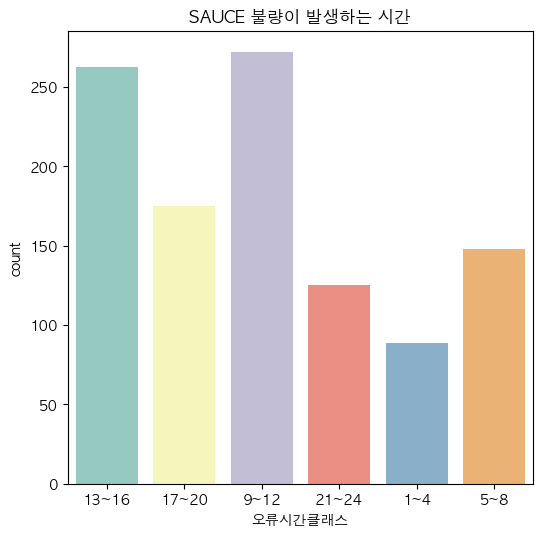

In [42]:
palette = sns.color_palette('Paired',9)
fig, ax = plt.subplots(figsize = (6,6),dpi=100)
plt.title('SAUCE 불량이 발생하는 시간')
sns.countplot(decook['오류시간클래스'],palette='Set3')

## Top 6 불량 발생

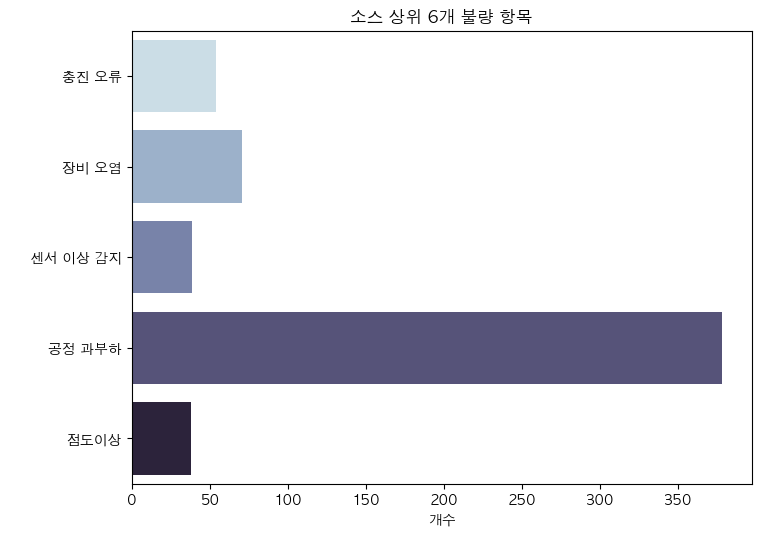

In [76]:
index1 = decook[decook['Error_Message'] == '기타'].index
decook.drop(index1,inplace=True)

top_list = decook['Error_Message'].value_counts().nlargest(5).index
df_top = decook[decook['Error_Message'].isin(top_list)]

plt.figure(figsize = (8,6),dpi = 100)
cnt=sns.countplot(y = 'Error_Message',data = df_top, palette='ch:s=.25,rot=-.25')
cnt.set_xlabel("개수")
cnt.set_ylabel(" ")
plt.title('소스 상위 6개 불량 항목')
plt.show()

In [166]:
from datetime import datetime
ncook['생산일자'] = ncook['생산일자'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))
ncook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11625 entries, 0 to 23971
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   구분             11625 non-null  object        
 1   품목명            11625 non-null  object        
 2   생산일자           11625 non-null  datetime64[ns]
 3   충전실온도          11625 non-null  float64       
 4   실링온도           11625 non-null  float64       
 5   실링압력           11625 non-null  float64       
 6   쿠킹온도           11625 non-null  float64       
 7   쿠킹스팀압력         11625 non-null  float64       
 8   불량             11625 non-null  int64         
 9   오류시간클래스        11625 non-null  object        
 10  오류조치시간         11625 non-null  float64       
 11  Error_Message  11625 non-null  object        
 12  작업장            11625 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 1.2+ MB


In [167]:
ncook['day'] = ncook['생산일자'].dt.dayofweek 

def index_to_string(x):
    if x==6:
        return 'Sunday'
    if x==0:
        return 'Monday'
    if x==1:
        return 'Tuesday'
    if x==2:
        return 'Wendsday'
    if x==3:
        return 'Thursday'
    if x==4:
        return 'Friday'
    if x==5:
        return 'Saturday'

data_= ncook.groupby(by='day')['day'].count()
data_= pd.DataFrame(data_)

data_.rename(columns = {'day':'sauce 생산개수'},inplace=True)

data_= data_.reset_index()

data_= data_.sort_values("day")

data_['day']=data_.apply(lambda x:index_to_string(x['day']),axis=1)
data_

,day,sauce 생산개수
0,Monday,1928
1,Tuesday,1858
2,Wendsday,2093
3,Thursday,2135
4,Friday,1542
5,Saturday,860
6,Sunday,1209


In [168]:
data_x = ncook[ncook['불량']==1]
data_x = data_x.groupby(by='day')['불량'].count()
data_x = pd.DataFrame(data_x)

data_x.rename(columns = {'불량':'sauce 불량개수'},inplace=True)

data_x=data_x.reset_index()

data_x=data_x.sort_values("day")

data_x['day']=data_x.apply(lambda x:index_to_string(x['day']),axis=1)
data_x

,day,sauce 불량개수
0,Monday,69
1,Tuesday,96
2,Wendsday,91
3,Thursday,90
4,Friday,64
5,Saturday,47
6,Sunday,62


------------

# Rice

In [52]:
ncook2 = cook[['구분','품목명','생산일자','충전실온도','실링온도','실링압력','쿠킹온도','쿠킹스팀압력','불량','오류시간클래스','오류조치시간','Error_Message','작업장']]
ncook2.head()

,구분,품목명,생산일자,충전실온도,실링온도,실링압력,쿠킹온도,쿠킹스팀압력,불량,오류시간클래스,오류조치시간,Error_Message,작업장
0,sauce,서비스면양념장(재),2021-01-03,71.669853,96.769853,201.844,131.742003,23.315,0,0,0.0,0,0
1,salad,고구마샐러드믹스베이스(재),2021-01-03,70.386480,102.086480,212.043,136.926080,23.226,0,0,0.0,0,0
2,soup,이마트가쓰오다시국물(재),2021-01-03,71.206130,112.306130,208.781,147.579680,23.516,0,0,0.0,0,0
3,salad,고구마샐러드바145g(재),2021-01-03,70.430565,96.030565,208.269,131.569165,23.692,0,0,0.0,0,0
4,sauce,이츠웰골드마요네즈1kg(재),2021-01-03,72.179318,114.079318,211.625,149.928068,23.899,0,0,0.0,0,0


In [53]:
from datetime import datetime
ncook2['생산일자'] = ncook2['생산일자'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))
ncook2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23972 entries, 0 to 23971
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   구분             23972 non-null  object        
 1   품목명            23972 non-null  object        
 2   생산일자           23972 non-null  datetime64[ns]
 3   충전실온도          23972 non-null  float64       
 4   실링온도           23972 non-null  float64       
 5   실링압력           23972 non-null  float64       
 6   쿠킹온도           23972 non-null  float64       
 7   쿠킹스팀압력         23972 non-null  float64       
 8   불량             23972 non-null  int64         
 9   오류시간클래스        23972 non-null  object        
 10  오류조치시간         23972 non-null  float64       
 11  Error_Message  23972 non-null  object        
 12  작업장            23972 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 2.4+ MB


In [54]:
ncook2['day'] = ncook2['생산일자'].dt.dayofweek 

def index_to_string(x):
    if x==6:
        return 'Sunday'
    if x==0:
        return 'Monday'
    if x==1:
        return 'Tuesday'
    if x==2:
        return 'Wendsday'
    if x==3:
        return 'Thursday'
    if x==4:
        return 'Friday'
    if x==5:
        return 'Saturday'

data_= ncook2.groupby(by='day')['day'].count()
data_= pd.DataFrame(data_)

data_.rename(columns = {'day':'rice 생산개수'},inplace=True)

data_= data_.reset_index()

data_= data_.sort_values("day")

data_['day']=data_.apply(lambda x:index_to_string(x['day']),axis=1)
data_

,day,rice 생산개수
0,Monday,3220
1,Tuesday,4139
2,Wendsday,4563
3,Thursday,4775
4,Friday,3834
5,Saturday,1911
6,Sunday,1530


## 요인별 Histogram

In [55]:
ncook2 = ncook2[ncook2['구분'] == 'rice']
decook2 = ncook2[ncook2['불량'] == 1]
decook2


df_numeric = ncook.select_dtypes(exclude = 'object')
df_numeric_x = df_numeric.drop("불량", axis = 1)
df_numeric_y = df_numeric["불량"]
df_numeric_x.head()


,충전실온도,실링온도,실링압력,쿠킹온도,쿠킹스팀압력,오류조치시간
0,71.669853,96.769853,201.844,131.742003,23.315,0.0
1,70.386480,102.086480,212.043,136.926080,23.226,0.0
2,71.206130,112.306130,208.781,147.579680,23.516,0.0
3,70.430565,96.030565,208.269,131.569165,23.692,0.0
4,72.179318,114.079318,211.625,149.928068,23.899,0.0


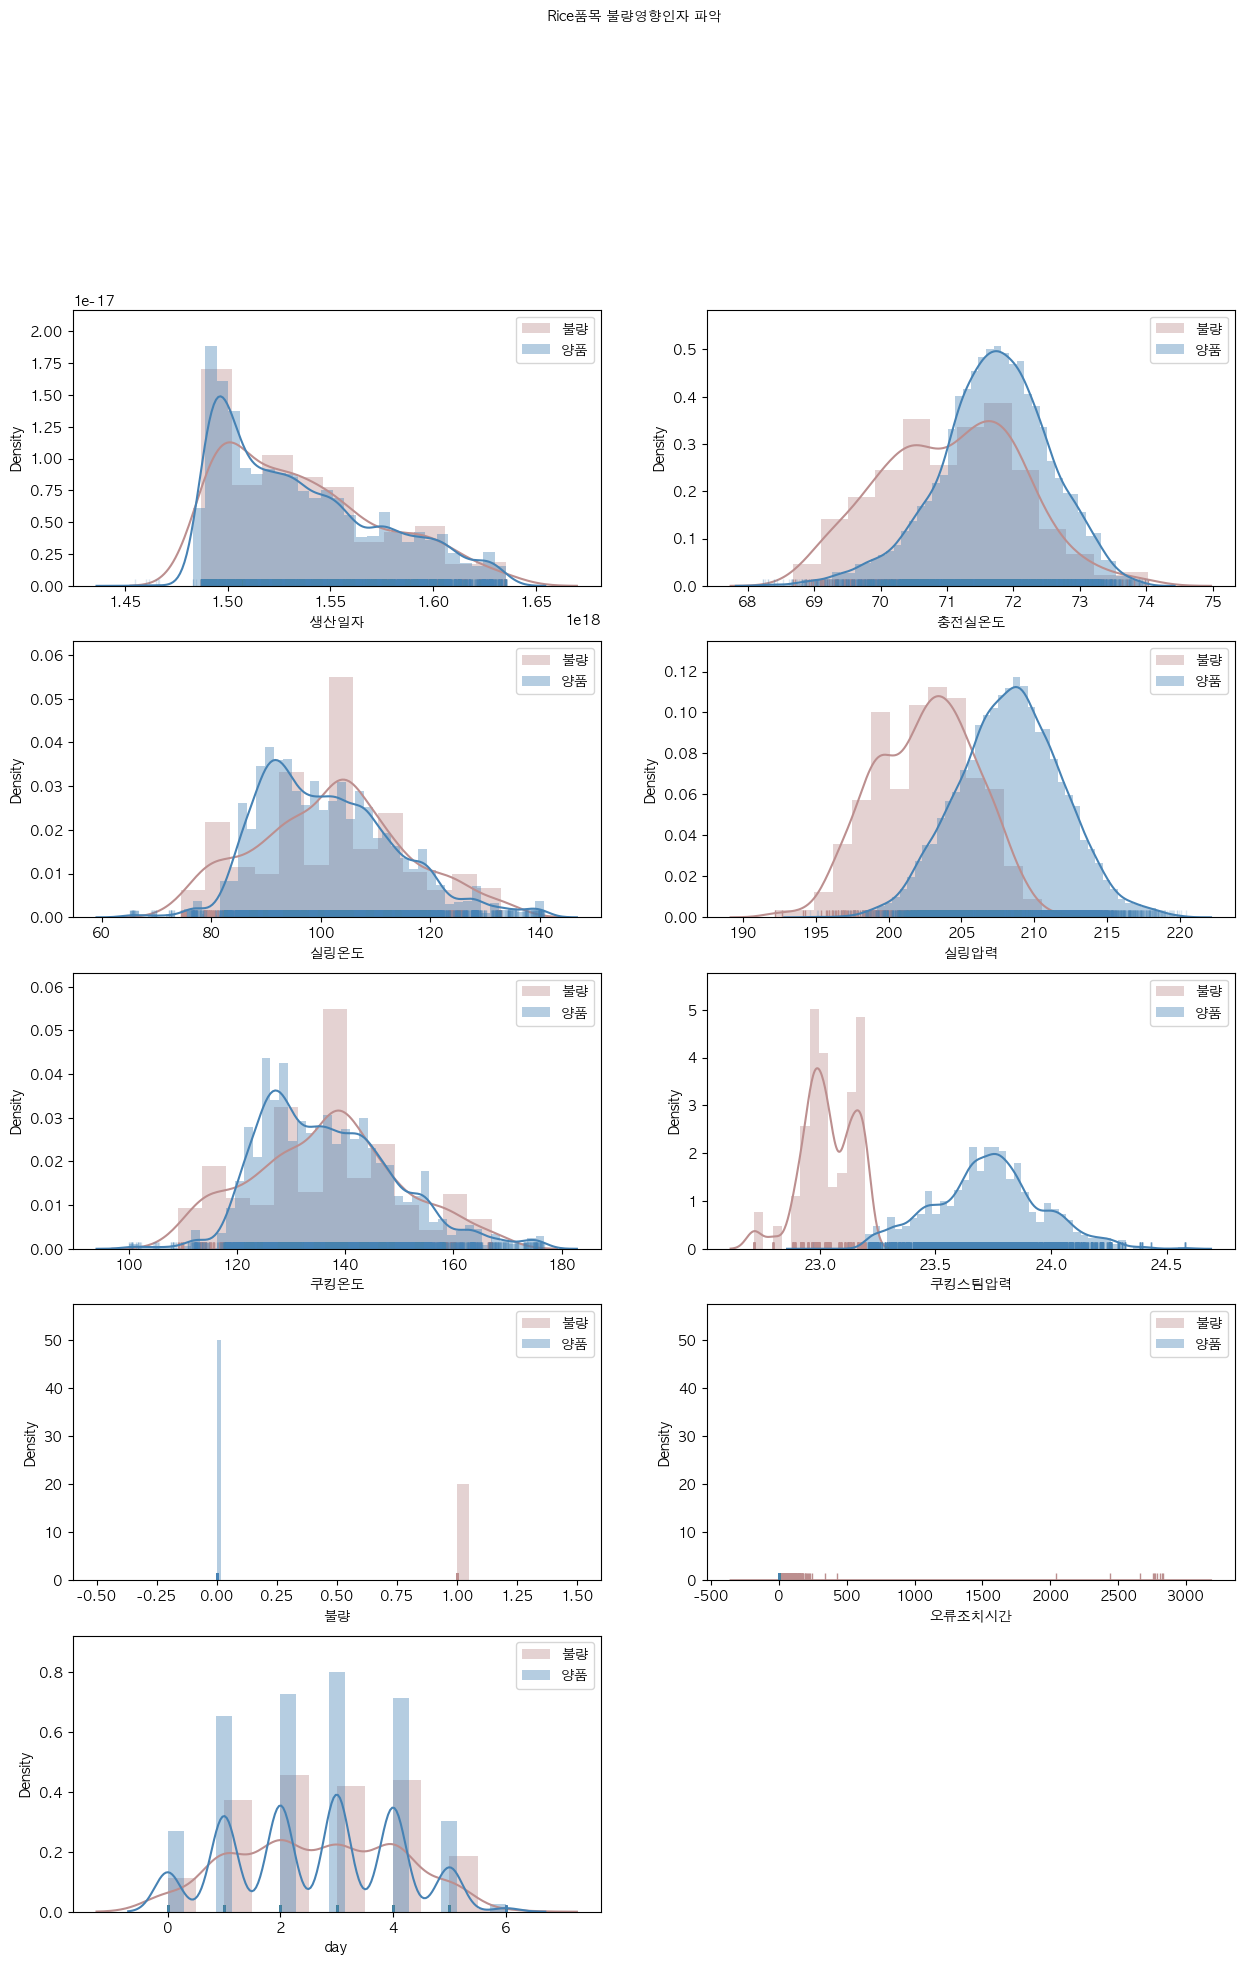

In [179]:
i = 0
columns = df_numeric.columns
palette = sns.color_palette('Paired',9)

fig = plt.figure(figsize = (15, 30),dpi=100)

for col in df_numeric.columns: 
    plt.subplot(ncook2.shape[1]//2, 2, i+1)
    i += 1
    sns.distplot(ncook2[ncook2["불량"] == 1][col], label = "불량", color='rosybrown',kde=True,rug=True,rug_kws={'alpha':1})
    sns.distplot(ncook2[ncook2["불량"] == 0][col], label = "양품",color='steelblue',kde=True,rug=True,rug_kws={'alpha':0.2})
    
    plt.xlabel(col)
    plt.legend()
    plt.suptitle('Rice품목 불량영향인자 파악',fontsize=10)
plt.show()

## Rice 내 작업장명 별 불량률

In [56]:
decook2['작업장'].value_counts()

충전    329
쿠킹    120
포장      5
계량      1
Name: 작업장, dtype: int64

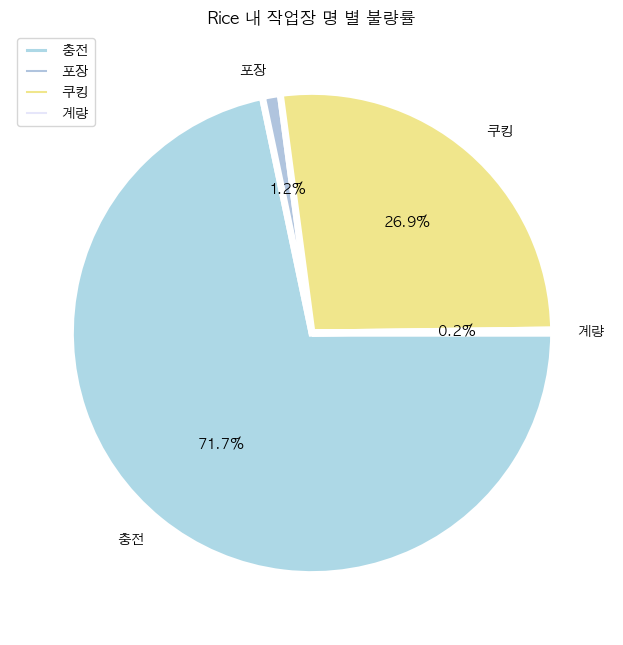

In [57]:
dfcount = decook2.groupby("작업장", as_index = False).agg("count")
labels = ['충전','포장','쿠킹','계량']
colors = ['lightblue', 'lightsteelblue','khaki','lavender']
 
frequency = [71.7,1.2,26.9,0.2] 
wedgeprops={'width': 1, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(15,8),dpi=100) 
fig.set_facecolor('white') 
ax = fig.add_subplot()
 
pie = ax.pie(frequency,
       counterclock=False, 
       autopct=lambda p : '{:.1f}%'.format(p),
       colors =colors,
       wedgeprops=wedgeprops,
       labels=labels
       )
 
plt.legend(pie[0],labels) 
plt.title('Rice 내 작업장 명 별 불량률')
plt.show()

## Rice 불량, 오류 발생시각

<AxesSubplot:title={'center':'불량이 발생하는 시간'}, xlabel='오류시간클래스', ylabel='count'>

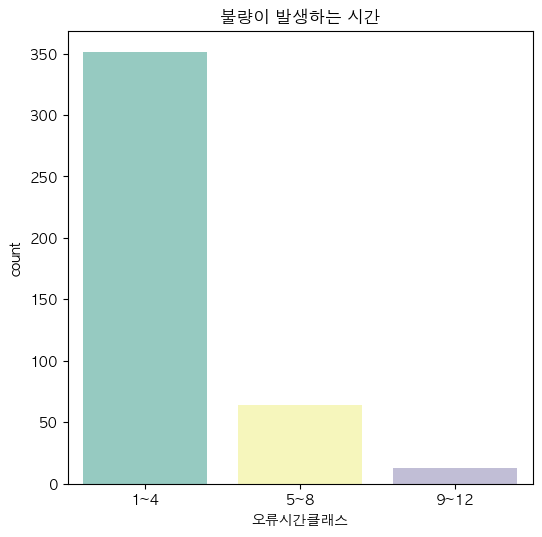

In [93]:
palette = sns.color_palette('Paired',9)
fig, ax = plt.subplots(figsize = (6,6),dpi=100)
plt.title('불량이 발생하는 시간')
sns.countplot(decook2['오류시간클래스'],palette='Set3')

In [95]:
#오류시간클래스
x=decook2.groupby('오류시간클래스')['불량'].count()
pd.DataFrame(x)

,불량
오류시간클래스,
1~4,351
5~8,64
9~12,13


In [97]:
from datetime import datetime
ncook2['생산일자'] = ncook2['생산일자'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))
ncook2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9550 entries, 2404 to 23970
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   구분             9550 non-null   object        
 1   품목명            9550 non-null   object        
 2   생산일자           9550 non-null   datetime64[ns]
 3   충전실온도          9550 non-null   float64       
 4   실링온도           9550 non-null   float64       
 5   실링압력           9550 non-null   float64       
 6   쿠킹온도           9550 non-null   float64       
 7   쿠킹스팀압력         9550 non-null   float64       
 8   불량             9550 non-null   int64         
 9   오류시간클래스        9550 non-null   object        
 10  오류조치시간         9550 non-null   float64       
 11  Error_Message  9550 non-null   object        
 12  작업장            9550 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 1.0+ MB


In [98]:
ncook2['day'] = ncook2['생산일자'].dt.dayofweek 
ncook2['day']

def index_to_string(x):
    if x==6:
        return 'Sunday'
    if x==0:
        return 'Monday'
    if x==1:
        return 'Tuesday'
    if x==2:
        return 'Wendsday'
    if x==3:
        return 'Thursday'
    if x==4:
        return 'Friday'
    if x==5:
        return 'Saturday'

data_ = ncook2.groupby(by='day')['day'].count()
data_ = pd.DataFrame(data_)

data_.rename(columns = {'day':'rice생산개수'},inplace=True)

data_ = data_.reset_index()

data_ = data_.sort_values("day")

data_['day']=data_.apply(lambda x:index_to_string(x['day']),axis=1)
data_

,day,rice생산개수
0,Monday,729
1,Tuesday,1789
2,Wendsday,1996
3,Thursday,2182
4,Friday,1955
5,Saturday,833
6,Sunday,66


In [99]:
data_x=ncook2[ncook2['불량']==1]
data_x=data_x.groupby(by='day')['불량'].count()
data_x=pd.DataFrame(data_x)

data_x.rename(columns = {'불량':'Rice 불량개수'},inplace=True)

data_x=data_x.reset_index()

data_x=data_x.sort_values("day")

data_x['day']=data_x.apply(lambda x:index_to_string(x['day']),axis=1)
data_x

,day,Rice 불량개수
0,Monday,24
1,Tuesday,80
2,Wendsday,98
3,Thursday,90
4,Friday,94
5,Saturday,40
6,Sunday,2


In [100]:
data = pd.concat([data_,data_x],axis=1)
data

,day,rice생산개수,day,Rice 불량개수
0,Monday,729,Monday,24
1,Tuesday,1789,Tuesday,80
2,Wendsday,1996,Wendsday,98
3,Thursday,2182,Thursday,90
4,Friday,1955,Friday,94
5,Saturday,833,Saturday,40
6,Sunday,66,Sunday,2


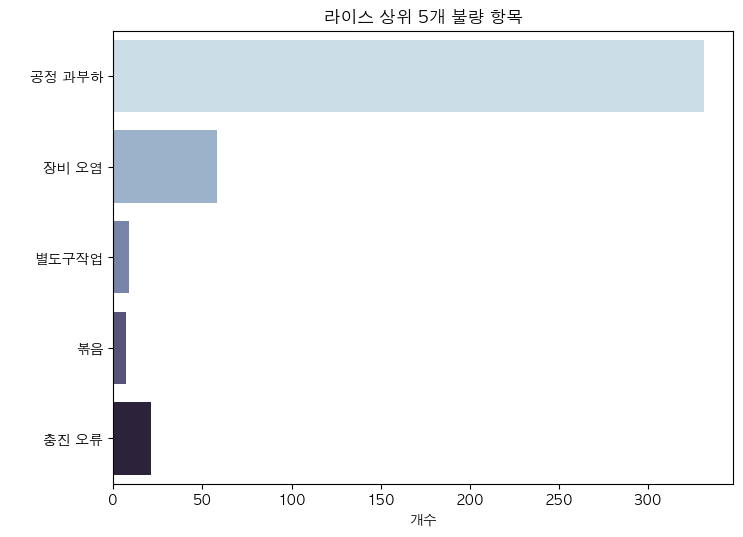

In [75]:
index1 = decook2[decook2['Error_Message'] == '기타'].index
decook2.drop(index1,inplace=True)

top_list = decook2['Error_Message'].value_counts().nlargest(5).index
df_top = decook2[decook2['Error_Message'].isin(top_list)]

plt.figure(figsize = (8,6),dpi = 100)
cnt=sns.countplot(y = 'Error_Message',data = df_top, palette='ch:s=.25,rot=-.25')
cnt.set_xlabel("개수")
cnt.set_ylabel(" ")
plt.title('라이스 상위 5개 불량 항목')
plt.show()

## 에러메세지 

In [101]:
x=decook2.groupby(['구분','Error_Message'])['Error_Message'].count()
x.index = x.index.set_names(['구분', '에러메세지항목'])
x=pd.DataFrame(x).reset_index()
x.sort_values(by='Error_Message',ascending=False)

,구분,에러메세지항목,Error_Message
2,rice,공정 과부하,315
12,rice,장비 오염,56
14,rice,충진 오류,20
5,rice,기타,10
6,rice,별도구작업,9
7,rice,볶음,7
11,rice,원료,2
0,rice,PSD패킹 교체,1
1,rice,QA 규격 오류,1
3,rice,구동부 이상,1


--------------

## Drink 

<AxesSubplot:title={'center':'불량이 발생하는 시간'}, xlabel='오류발생시각', ylabel='count'>

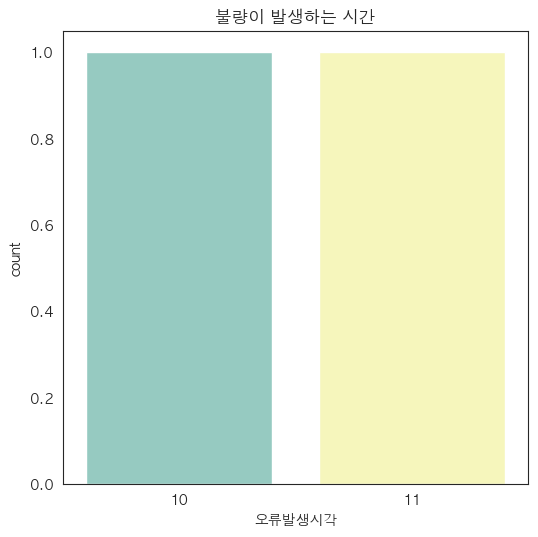

In [429]:
palette = sns.color_palette('Paired',9)
fig, ax = plt.subplots(figsize = (6,6),dpi=100)
plt.title('불량이 발생하는 시간')
sns.countplot(decook['오류발생시각'],palette='Set3')

## Soup

In [201]:
ncook3 = cook[['구분','품목명','생산일자','충전실온도','실링온도','실링압력','쿠킹온도','쿠킹스팀압력','불량','오류시간클래스','오류조치시간','Error_Message','작업장']]
ncook3 = ncook3[ncook3['구분'] == 'soup']
decook3 = ncook3[ncook3['불량'] == 1]

<AxesSubplot:title={'center':'불량이 발생하는 시간'}, xlabel='오류시간클래스', ylabel='count'>

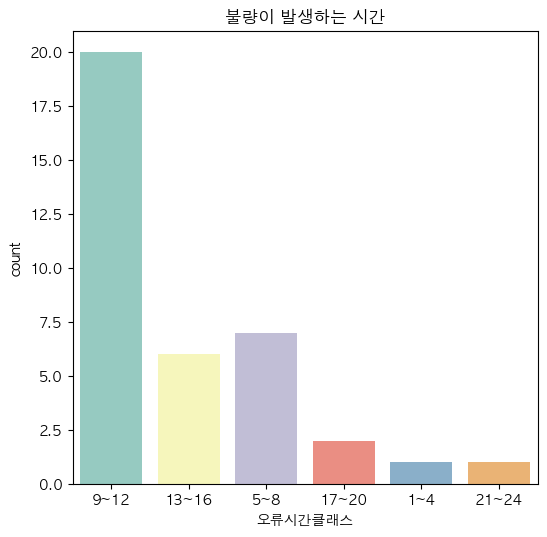

In [202]:
palette = sns.color_palette('Paired',9)
fig, ax = plt.subplots(figsize = (6,6),dpi=100)
plt.title('불량이 발생하는 시간')
sns.countplot(decook3['오류시간클래스'],palette='Set3')

## Salad

In [203]:
ncook3 = cook[['구분','품목명','생산일자','충전실온도','실링온도','실링압력','쿠킹온도','쿠킹스팀압력','불량','오류시간클래스','오류조치시간','Error_Message','작업장']]
ncook3 = ncook3[ncook3['구분'] == 'salad']
decook3 = ncook3[ncook3['불량'] == 1]

<AxesSubplot:title={'center':'불량이 발생하는 시간'}, xlabel='오류시간클래스', ylabel='count'>

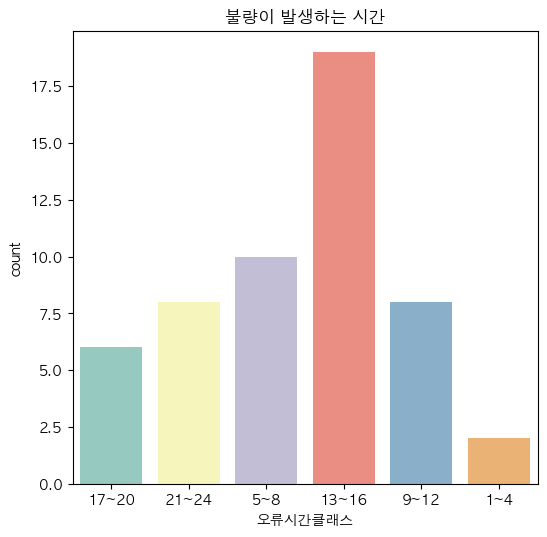

In [206]:
palette = sns.color_palette('Paired',9)
fig, ax = plt.subplots(figsize = (6,6),dpi=100)
plt.title('불량이 발생하는 시간')
sns.countplot(decook3['오류시간클래스'],palette='Set3')

## 제품군별 불량개수

<AxesSubplot:xlabel='구분', ylabel='count'>

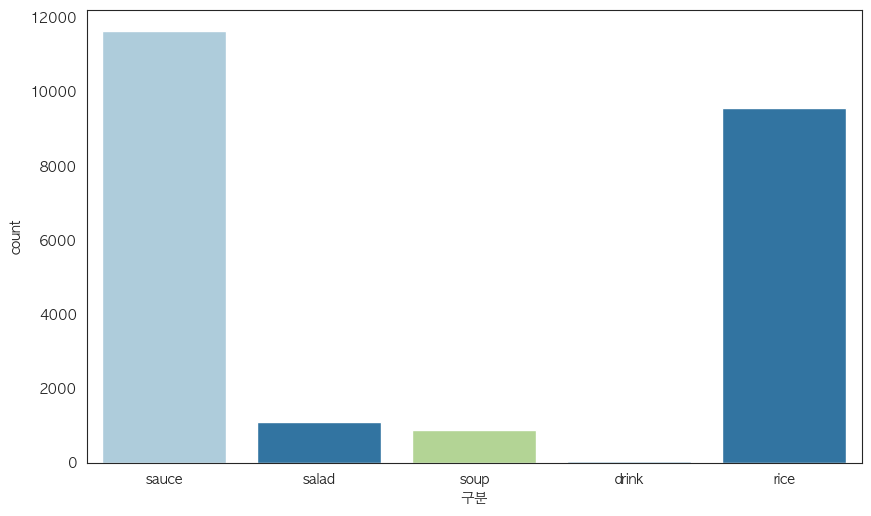

In [365]:
palette = sns.color_palette('Paired',3)
fig, ax = plt.subplots(figsize = (10,6), dpi = 100)
sns.countplot(x = '구분',data = cook, palette=palette)

## 제품군별 불량률

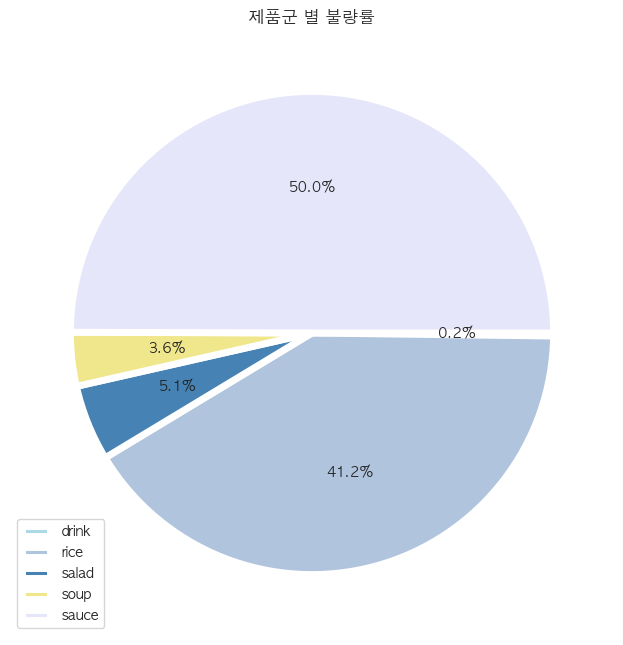

In [366]:
dfcount = cook.groupby("구분", as_index = False).agg("count")
labels = dfcount["구분"]
colors = ['lightblue', 'lightsteelblue', 'steelblue','khaki','lavender']
 

labels = ['drink', 'rice', 'salad', 'soup', 'sauce'] ## 라벨
frequency = [0.2,41.2,5.1,3.6,50.0] ## 빈도
wedgeprops={'width': 1, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(15,8),dpi=100) 
fig.set_facecolor('white') 
ax = fig.add_subplot()
 
pie = ax.pie(frequency,
       counterclock=False, 
       autopct=lambda p : '{:.1f}%'.format(p),
       colors =colors,
       wedgeprops=wedgeprops
       )
 
plt.legend(pie[0],labels) 
plt.title('제품군 별 불량률')
plt.show()

## 작업장별 불량률

In [367]:
cook['작업장명'] = 0

cook.loc[cook['작업장코드'] == 'W002', '작업장명'] = '계량실'
cook.loc[cook['작업장코드'] == 'W003', '작업장명'] = '쿠킹실'
cook.loc[cook['작업장코드'] == 'W005', '작업장명'] = '충전실'
cook.loc[cook['작업장코드'] == 'W007', '작업장명'] = '포장실'
cook.loc[cook['작업장코드'] == 'W012', '작업장명'] = '기타'

cook['작업장명'].value_counts()

충전실    12973
쿠킹실     8152
포장실     2475
계량실      357
기타        15
Name: 작업장명, dtype: int64

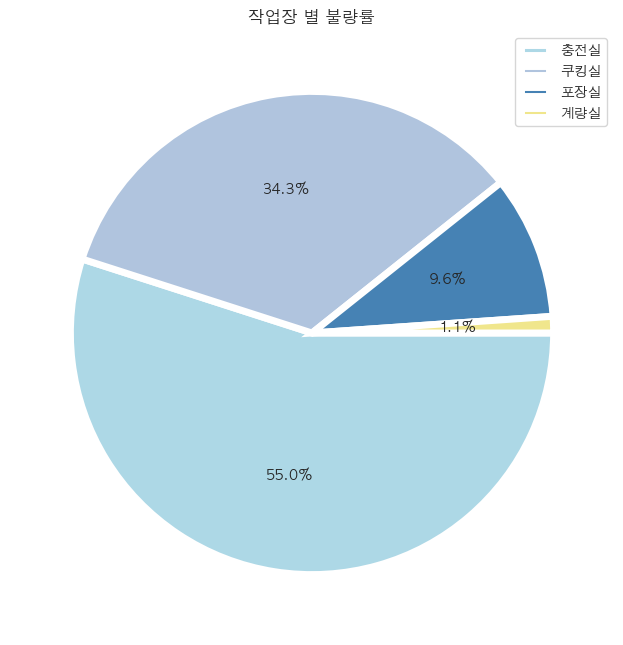

In [368]:
cook1 = cook[cook["불량"] == 1]
cookcount = cook1.groupby("작업장명", as_index = False).agg("count")
labels = cookcount["작업장명"]
colors = ['lightblue', 'lightsteelblue', 'steelblue','khaki','lavender']
 

labels = ['충전실','쿠킹실','포장실','계량실'] 
frequency = [54.9,34.3,9.6,1.1] 
wedgeprops={'width': 1, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(15,8),dpi=100) 
fig.set_facecolor('white') 
ax = fig.add_subplot()
 
pie = ax.pie(frequency,
       counterclock=False, 
       autopct=lambda p : '{:.1f}%'.format(p),
       colors =colors,
       wedgeprops=wedgeprops
       )
 
plt.legend(pie[0],labels) 
plt.title('작업장 별 불량률')
plt.show()

## Cooking 요일별 날짜 파생변수 생성

In [498]:
cook['생산일자']

0        2021-01-03
1        2021-01-03
2        2021-01-03
3        2021-01-03
4        2021-01-03
            ...    
23967    2021-10-28
23968    2021-10-29
23969    2021-10-29
23970    2021-10-29
23971    2021-10-29
Name: 생산일자, Length: 23972, dtype: object

In [499]:
from datetime import datetime
cook['생산일자'] = cook['생산일자'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))
cook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23972 entries, 0 to 23971
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   순번             23972 non-null  int64         
 1   생산라인코드         23972 non-null  object        
 2   생산라인명          23972 non-null  object        
 3   품목코드           23972 non-null  object        
 4   품목명            23972 non-null  object        
 5   작업장코드          23972 non-null  object        
 6   충전실온도          23972 non-null  float64       
 7   실링온도           23972 non-null  float64       
 8   쿠킹온도           23972 non-null  float64       
 9   쿠킹스팀압력         23972 non-null  float64       
 10  실링압력           23972 non-null  float64       
 11  생산시간           23972 non-null  float64       
 12  생산일자           23972 non-null  datetime64[ns]
 13  불량             23972 non-null  int64         
 14  발생시간           23972 non-null  object        
 15  오류발생시각         2397

## 생산일자 - 요일 변환

In [500]:
cook['day'] = cook['생산일자'].dt.dayofweek # 요일 칼럼
cook['day']

0        6
1        6
2        6
3        6
4        6
        ..
23967    3
23968    4
23969    4
23970    4
23971    4
Name: day, Length: 23972, dtype: int64

In [501]:
def index_to_string(x):
    if x==6:
        return 'Sunday'
    if x==0:
        return 'Monday'
    if x==1:
        return 'Tuesday'
    if x==2:
        return 'Wendsday'
    if x==3:
        return 'Thursday'
    if x==4:
        return 'Friday'
    if x==5:
        return 'Saturday'

## 전체데이터 요일별 생산량

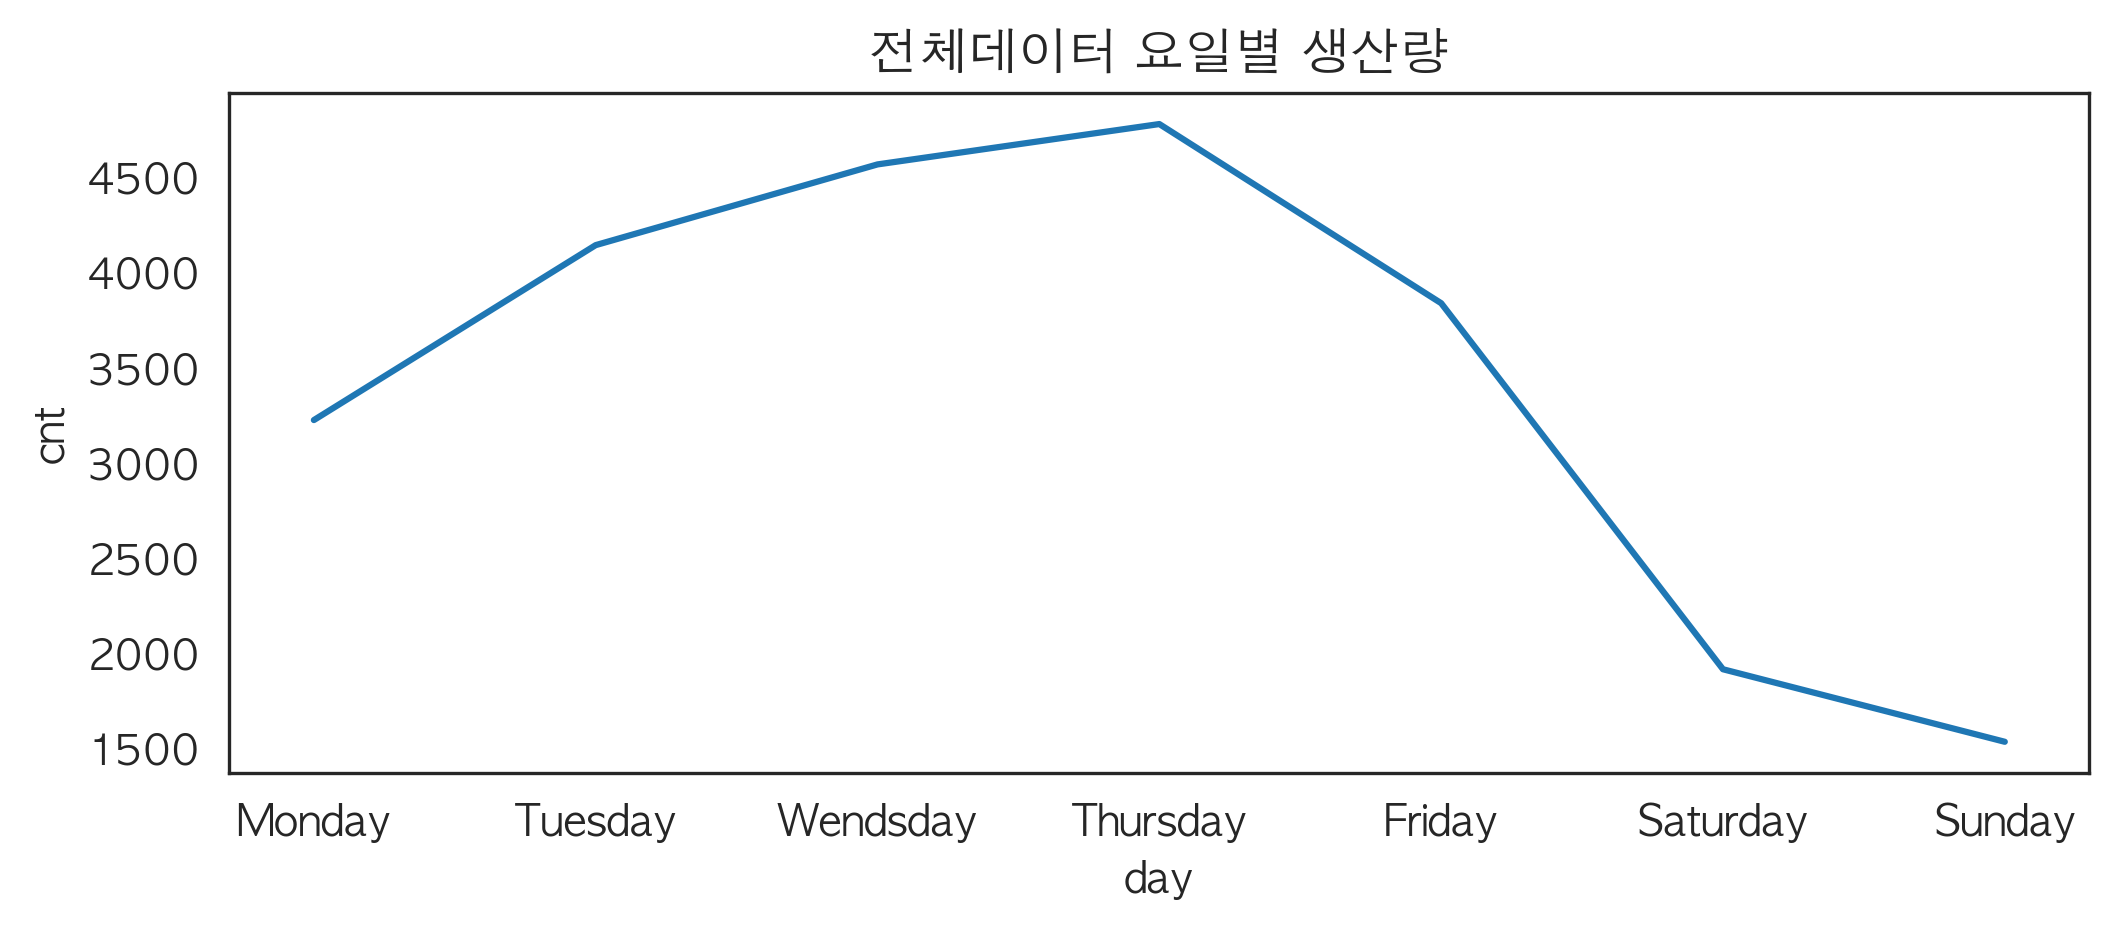

In [502]:
data_=cook.groupby(by='day')['day'].count()
data_=pd.DataFrame(data_)

data_.rename(columns = {'day':'cnt'},inplace=True)

data_=data_.reset_index()

data_=data_.sort_values("day")

data_['day']=data_.apply(lambda x:index_to_string(x['day']),axis=1)
data_
plt.figure(figsize = (8,3),dpi=300)

palette = sns.color_palette('Paired',9)
p = sns.lineplot(x='day',y='cnt',data=data_,palette=palette)
p.set_title("전체데이터 요일별 생산량")
plt.show()

sns.set_style("white")

## 전체데이터 요일별 불량개수

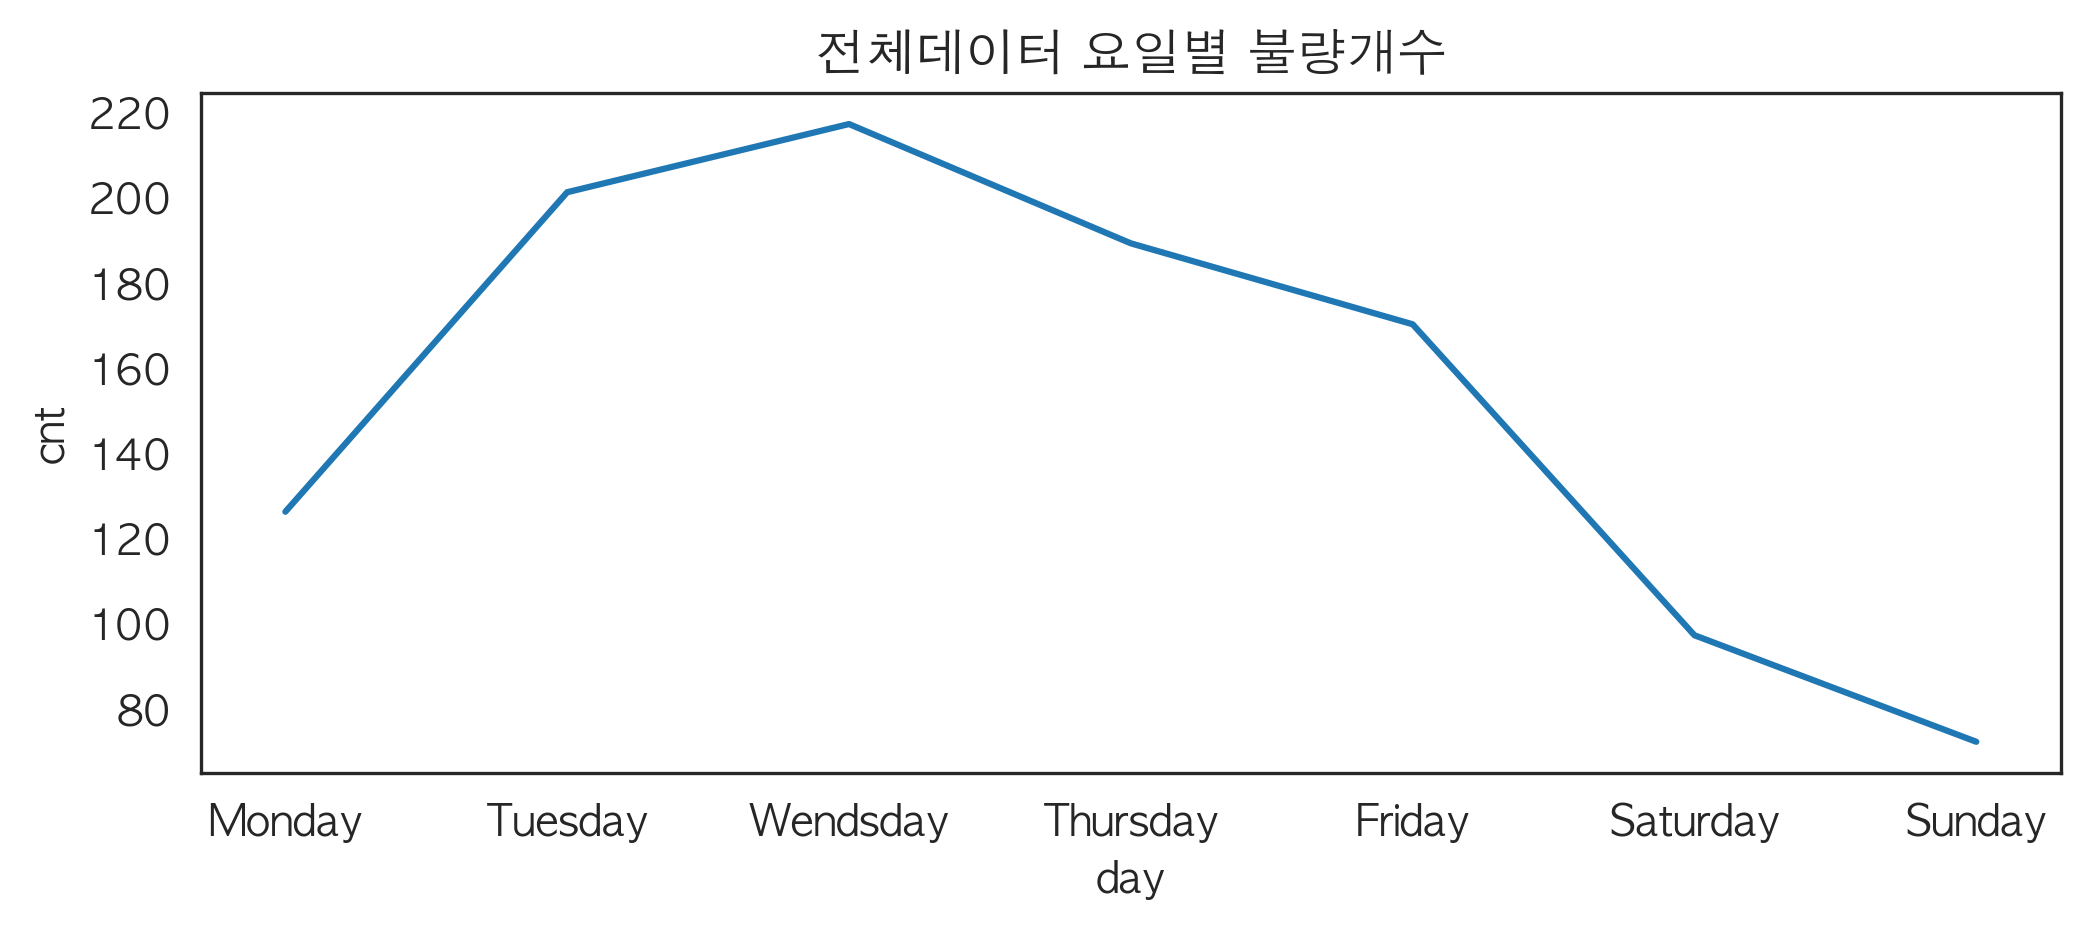

In [374]:
%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font', family='AppleGothic')

matplotlib.rc('axes', unicode_minus = False)
from scipy.stats import chi2_contingency
cook_x=cook[cook['불량']==1]
data_=cook_x.groupby(by='day')['day'].count()
data_=pd.DataFrame(data_)

data_.rename(columns = {'day':'cnt'},inplace=True)

data_=data_.reset_index()

data_=data_.sort_values("day")

data_['day']=data_.apply(lambda x:index_to_string(x['day']),axis=1)
data_
plt.figure(figsize = (8,3),dpi=300)

palette = sns.color_palette('Paired',9)
p=sns.lineplot(x='day',y='cnt',data=data_,palette=palette)

p.set_title("전체데이터 요일별 불량개수")
plt.show()
sns.set_style("white")

## Sauce 품목 요일별 생산량 및 불량

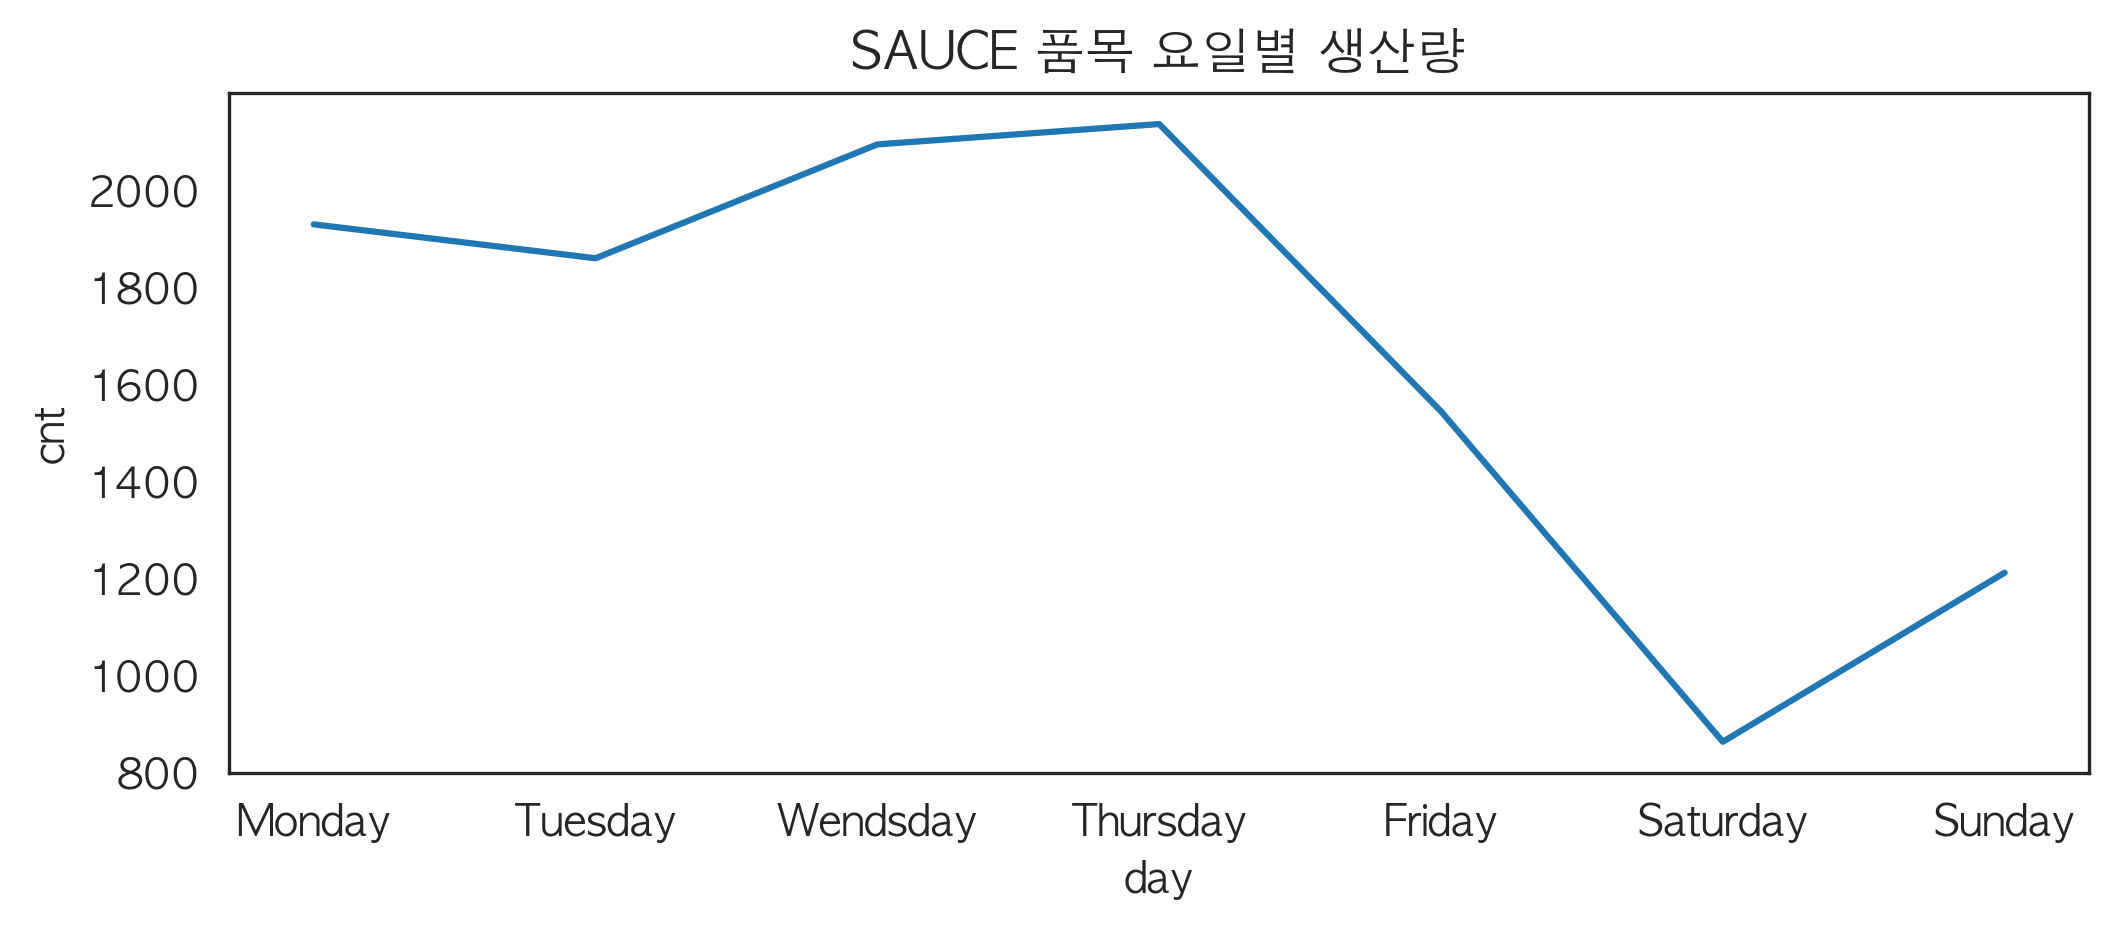

In [376]:
%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font', family='AppleGothic')

cook_s = cook[cook['구분']=='sauce']
data_ = cook_s.groupby(by='day')['day'].count()
data_ = pd.DataFrame(data_)

data_.rename(columns = {'day':'cnt'},inplace=True)

data_= data_.reset_index()

data_ = data_.sort_values("day")

data_['day']=data_.apply(lambda x:index_to_string(x['day']),axis=1)
data_
plt.figure(figsize = (8,3),dpi=300)

palette = sns.color_palette('Paired',9)
p = sns.lineplot(x='day',y='cnt',data=data_,palette=palette)
p.set_title("SAUCE 품목 요일별 생산량")
plt.show()
sns.set_style("white")

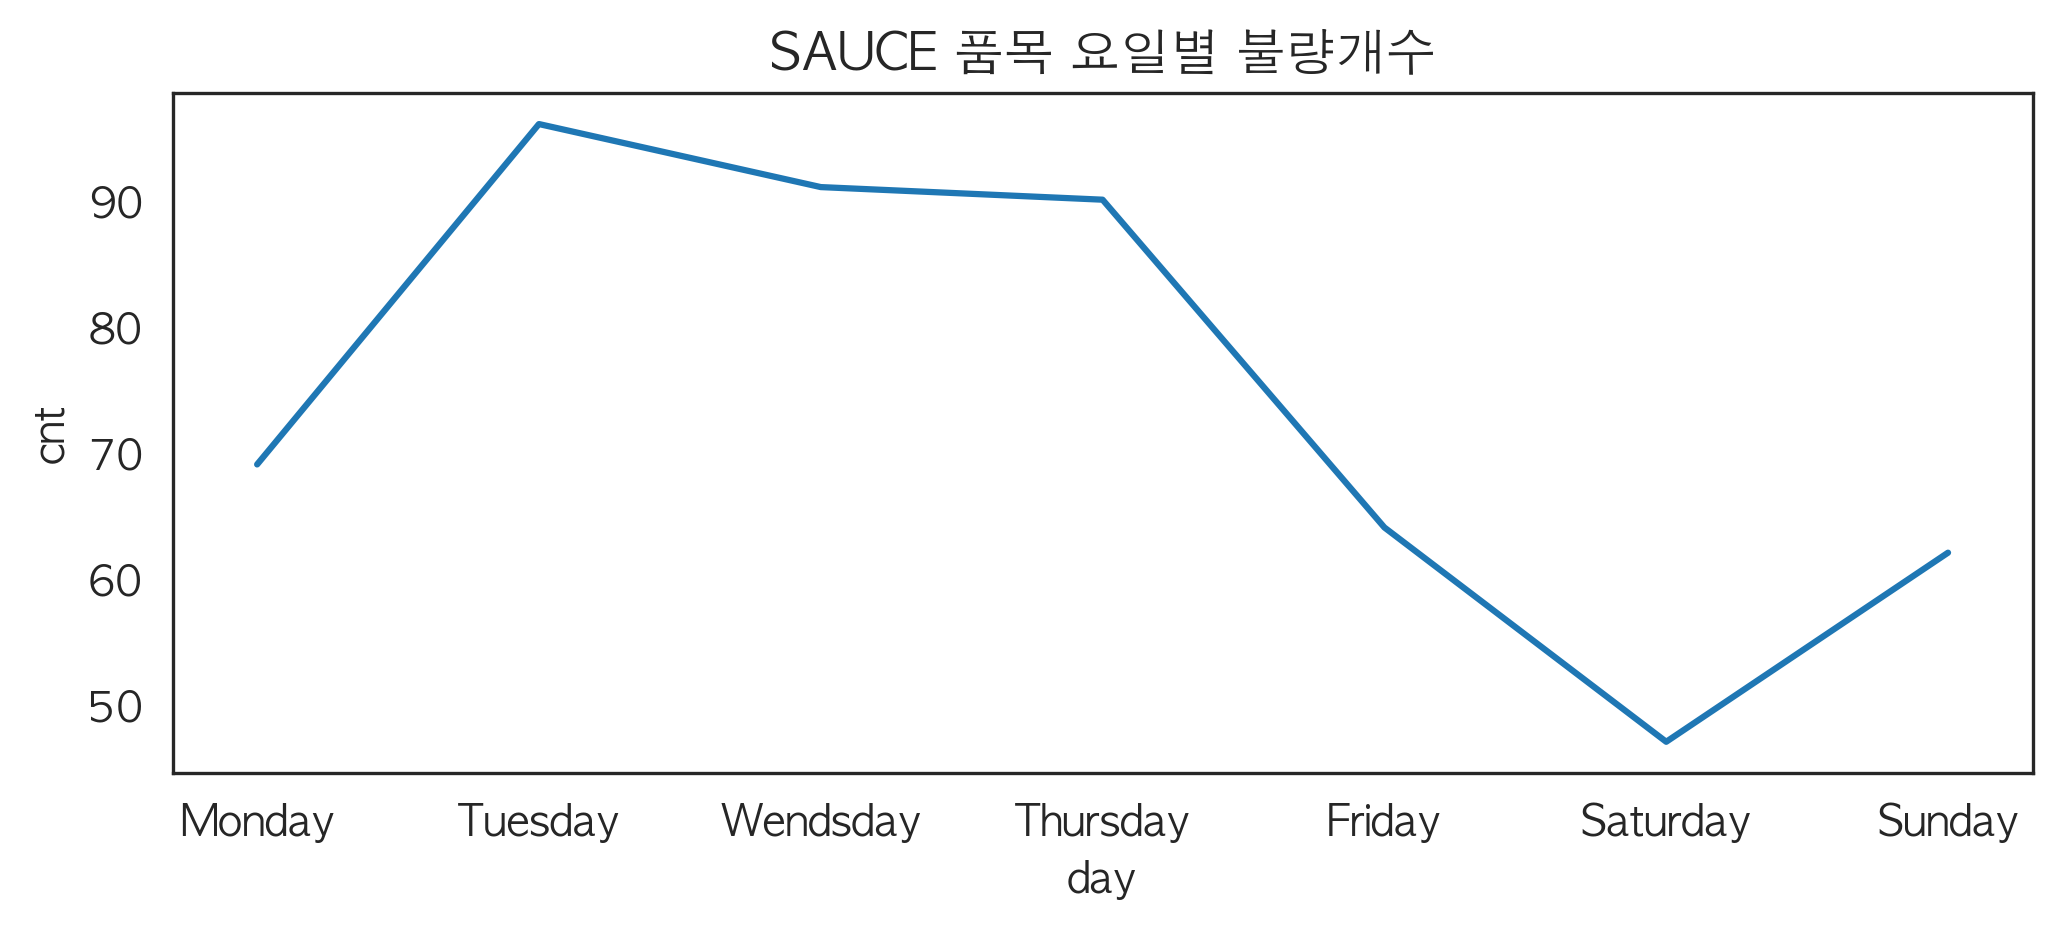

In [377]:
%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font', family='AppleGothic')

cook_s_x=cook[(cook['구분']=='sauce')&(cook['불량']==1)]
data_=cook_s_x.groupby(by='day')['day'].count()
data_=pd.DataFrame(data_)

data_.rename(columns = {'day':'cnt'},inplace=True)

data_=data_.reset_index()

data_=data_.sort_values("day")

data_['day']=data_.apply(lambda x:index_to_string(x['day']),axis=1)
data_
plt.figure(figsize = (8,3),dpi=300)

palette = sns.color_palette('Paired',9)
p=sns.lineplot(x='day',y='cnt',data=data_,palette=palette)
p.set_title("SAUCE 품목 요일별 불량개수")
plt.show()
sns.set_style("white")

## Rice 품목 요일별 생산량과 불량개수

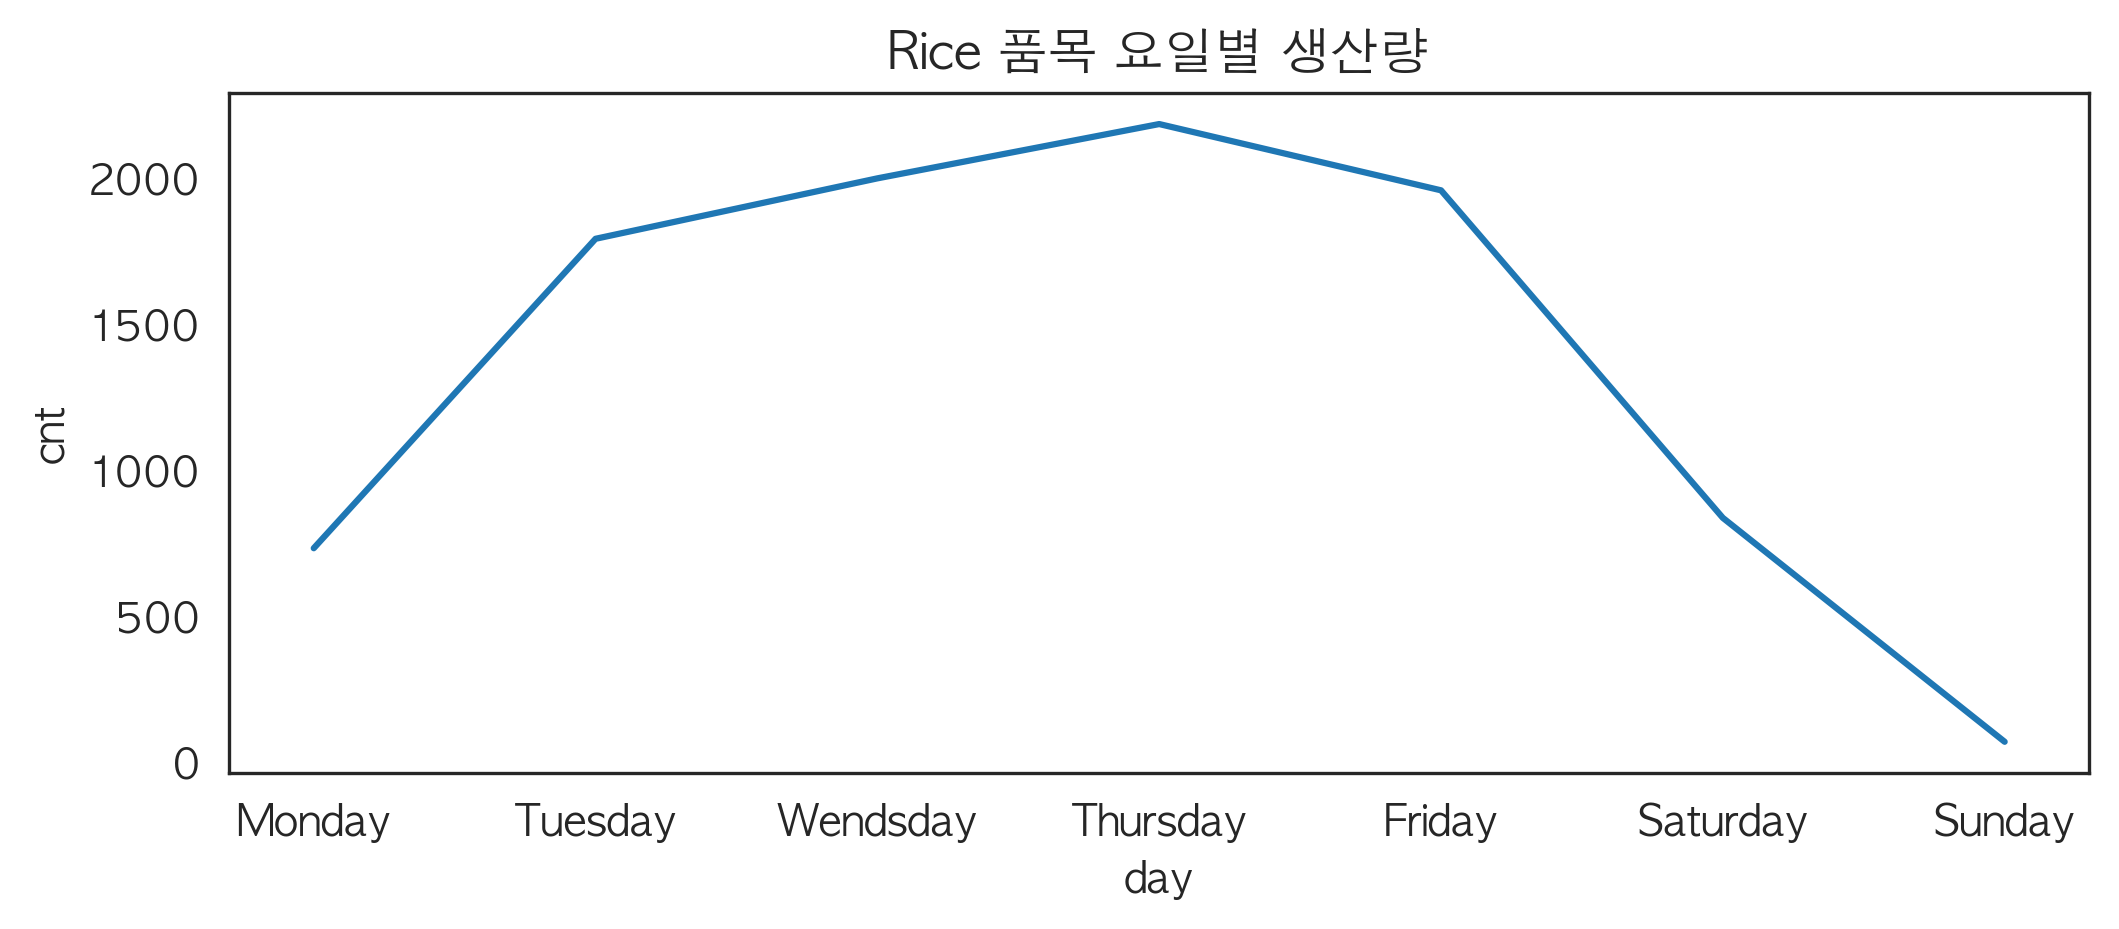

In [378]:
%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font', family='AppleGothic')

cook_s=cook[cook['구분']=='rice']
data_=cook_s.groupby(by='day')['day'].count()
data_=pd.DataFrame(data_)

data_.rename(columns = {'day':'cnt'},inplace=True)

data_=data_.reset_index()

data_=data_.sort_values("day")

data_['day']=data_.apply(lambda x:index_to_string(x['day']),axis=1)
data_
plt.figure(figsize = (8,3),dpi=300)

palette = sns.color_palette('Paired',9)
p=sns.lineplot(x='day',y='cnt',data=data_,palette=palette)
p.set_title("Rice 품목 요일별 생산량")
plt.show()
sns.set_style("white")

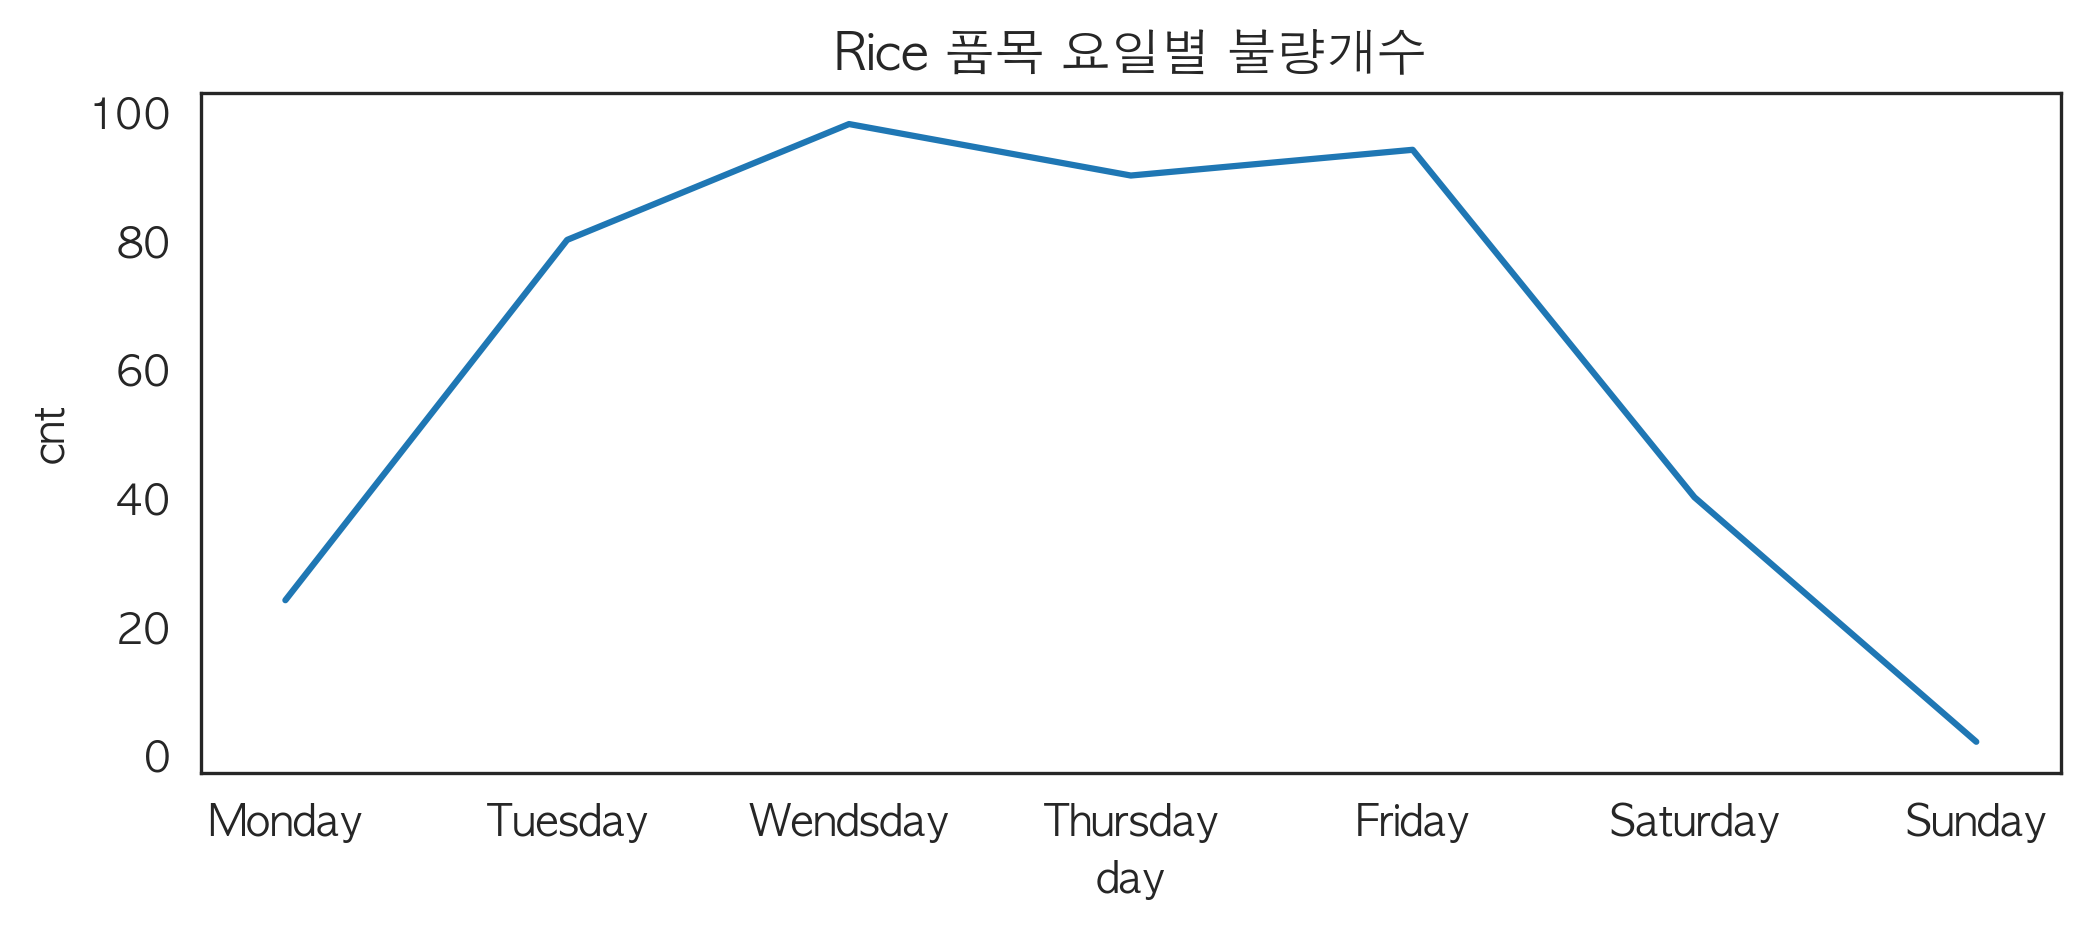

In [379]:
%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font', family='AppleGothic')

cook_s_x=cook[(cook['구분']=='rice')&(cook['불량']==1)]
data_=cook_s_x.groupby(by='day')['day'].count()
data_=pd.DataFrame(data_)

data_.rename(columns = {'day':'cnt'},inplace=True)

data_=data_.reset_index()

data_=data_.sort_values("day")

data_['day']=data_.apply(lambda x:index_to_string(x['day']),axis=1)
data_
plt.figure(figsize = (8,3),dpi=300)

palette = sns.color_palette('Paired',9)
p=sns.lineplot(x='day',y='cnt',data=data_,palette=palette)
p.set_title("Rice 품목 요일별 불량개수")
plt.show()
sns.set_style("white")

## Salad 품목 요일별 생산량 및 불량개수

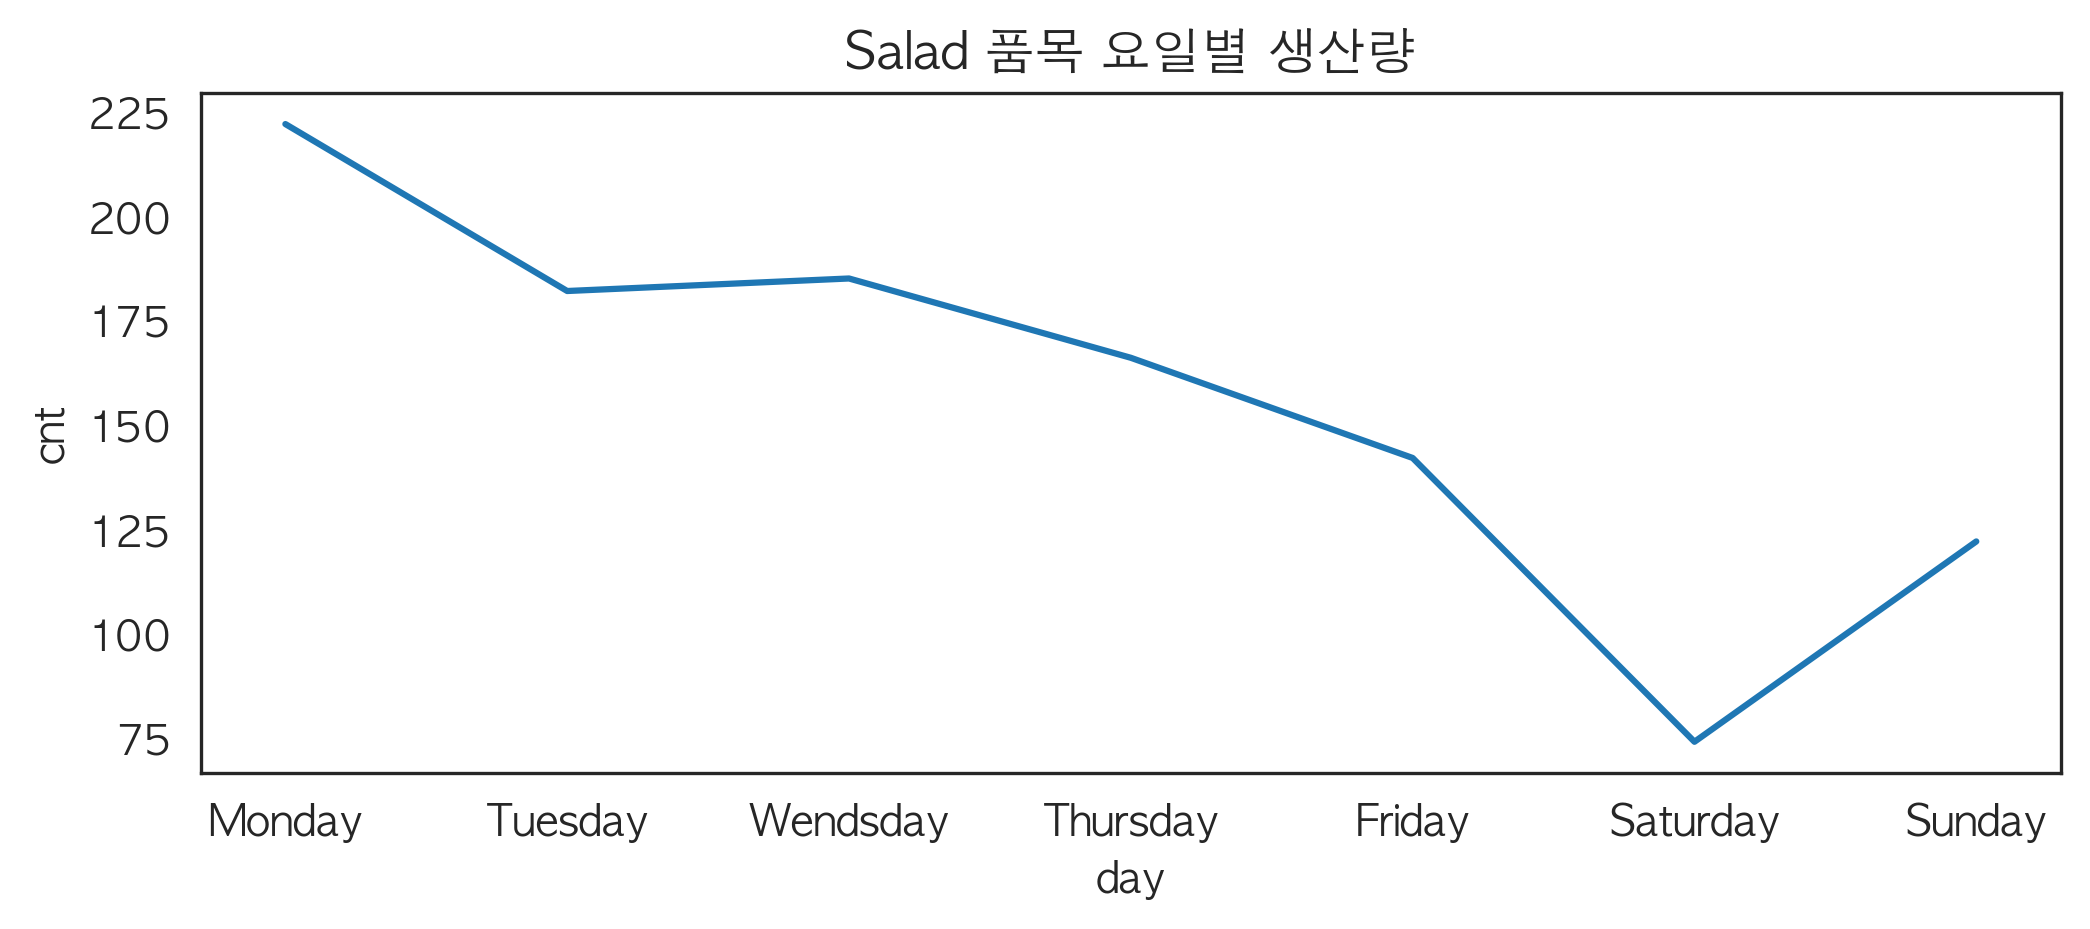

In [380]:
%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font', family='AppleGothic')

cook_s = cook[cook['구분']=='salad']
data_ = cook_s.groupby(by='day')['day'].count()
data_ = pd.DataFrame(data_)

data_.rename(columns = {'day':'cnt'},inplace=True)

data_ = data_.reset_index()

data_ = data_.sort_values("day")

data_['day']=data_.apply(lambda x:index_to_string(x['day']),axis=1)
data_
plt.figure(figsize = (8,3),dpi=300)

palette = sns.color_palette('Paired',9)
p = sns.lineplot(x='day',y='cnt',data=data_,palette=palette)
p.set_title("Salad 품목 요일별 생산량")
plt.show()
sns.set_style("white")

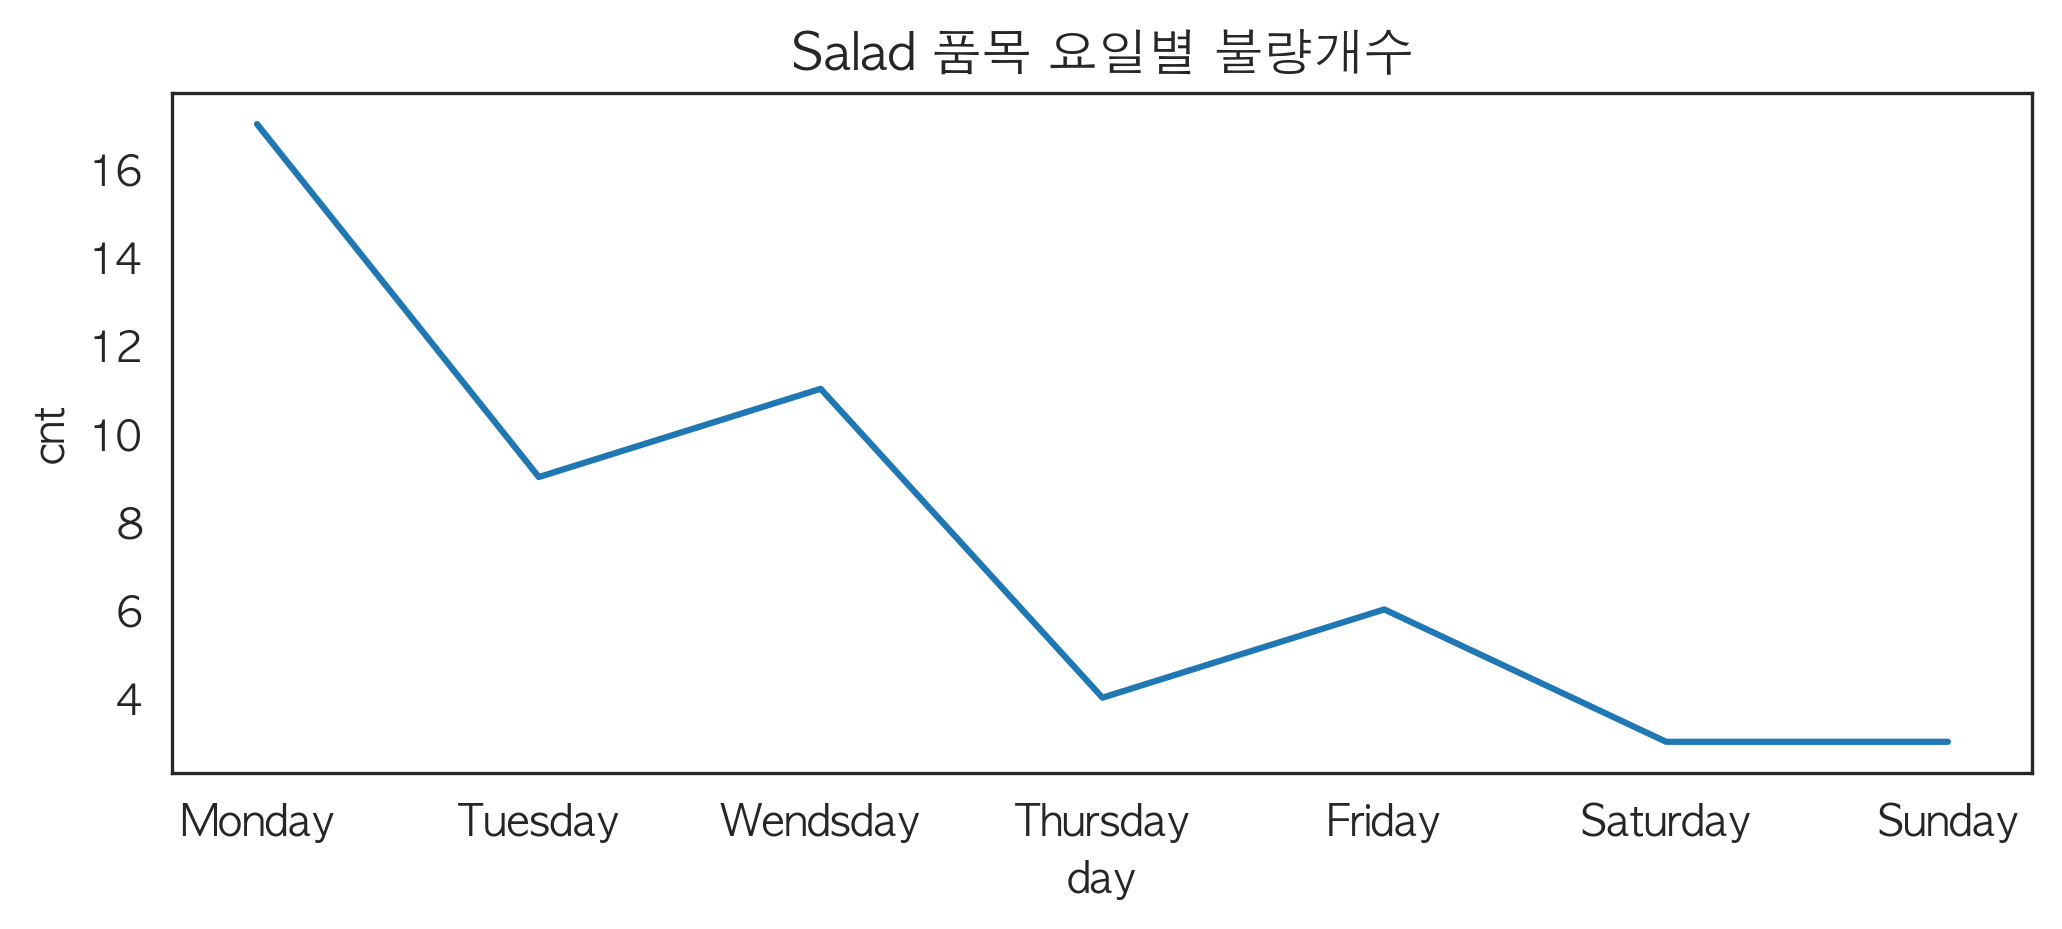

In [381]:
%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font', family='AppleGothic')

cook_s_x=cook[(cook['구분']=='salad')&(cook['불량']==1)]
data_=cook_s_x.groupby(by='day')['day'].count()
data_=pd.DataFrame(data_)

data_.rename(columns = {'day':'cnt'},inplace=True)

data_=data_.reset_index()

data_=data_.sort_values("day")

data_['day']=data_.apply(lambda x:index_to_string(x['day']),axis=1)
data_
plt.figure(figsize = (8,3),dpi=300)

palette = sns.color_palette('Paired',9)
p=sns.lineplot(x='day',y='cnt',data=data_,palette=palette)
p.set_title("Salad 품목 요일별 불량개수")
plt.show()
sns.set_style("white")


## Soup 품목 요일별 생산량 및 불량개수

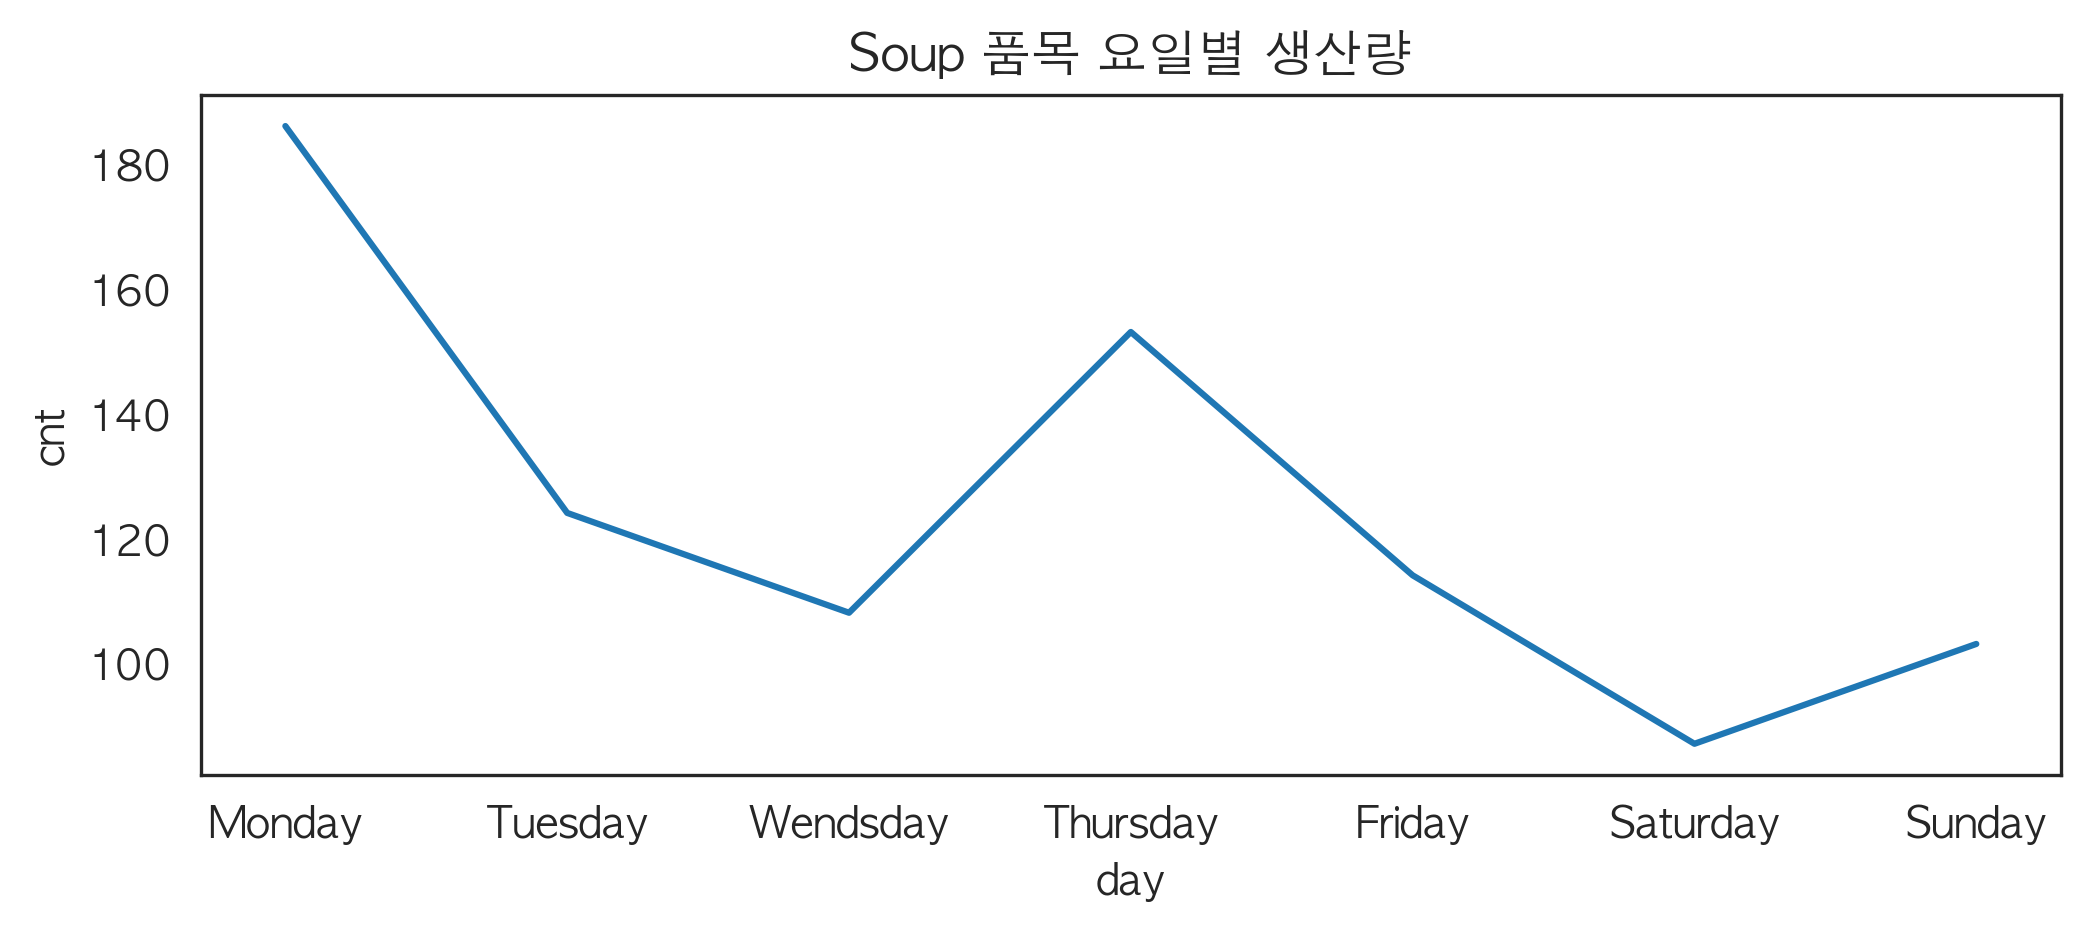

In [382]:
%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font', family='AppleGothic')

cook_s=cook[cook['구분']=='soup']
data_=cook_s.groupby(by='day')['day'].count()
data_=pd.DataFrame(data_)

data_.rename(columns = {'day':'cnt'},inplace=True)

data_=data_.reset_index()

data_=data_.sort_values("day")

data_['day']=data_.apply(lambda x:index_to_string(x['day']),axis=1)
data_
plt.figure(figsize = (8,3),dpi=300)

palette = sns.color_palette('Paired',9)
p=sns.lineplot(x='day',y='cnt',data=data_,palette=palette)
p.set_title("Soup 품목 요일별 생산량")
plt.show()
sns.set_style("white")

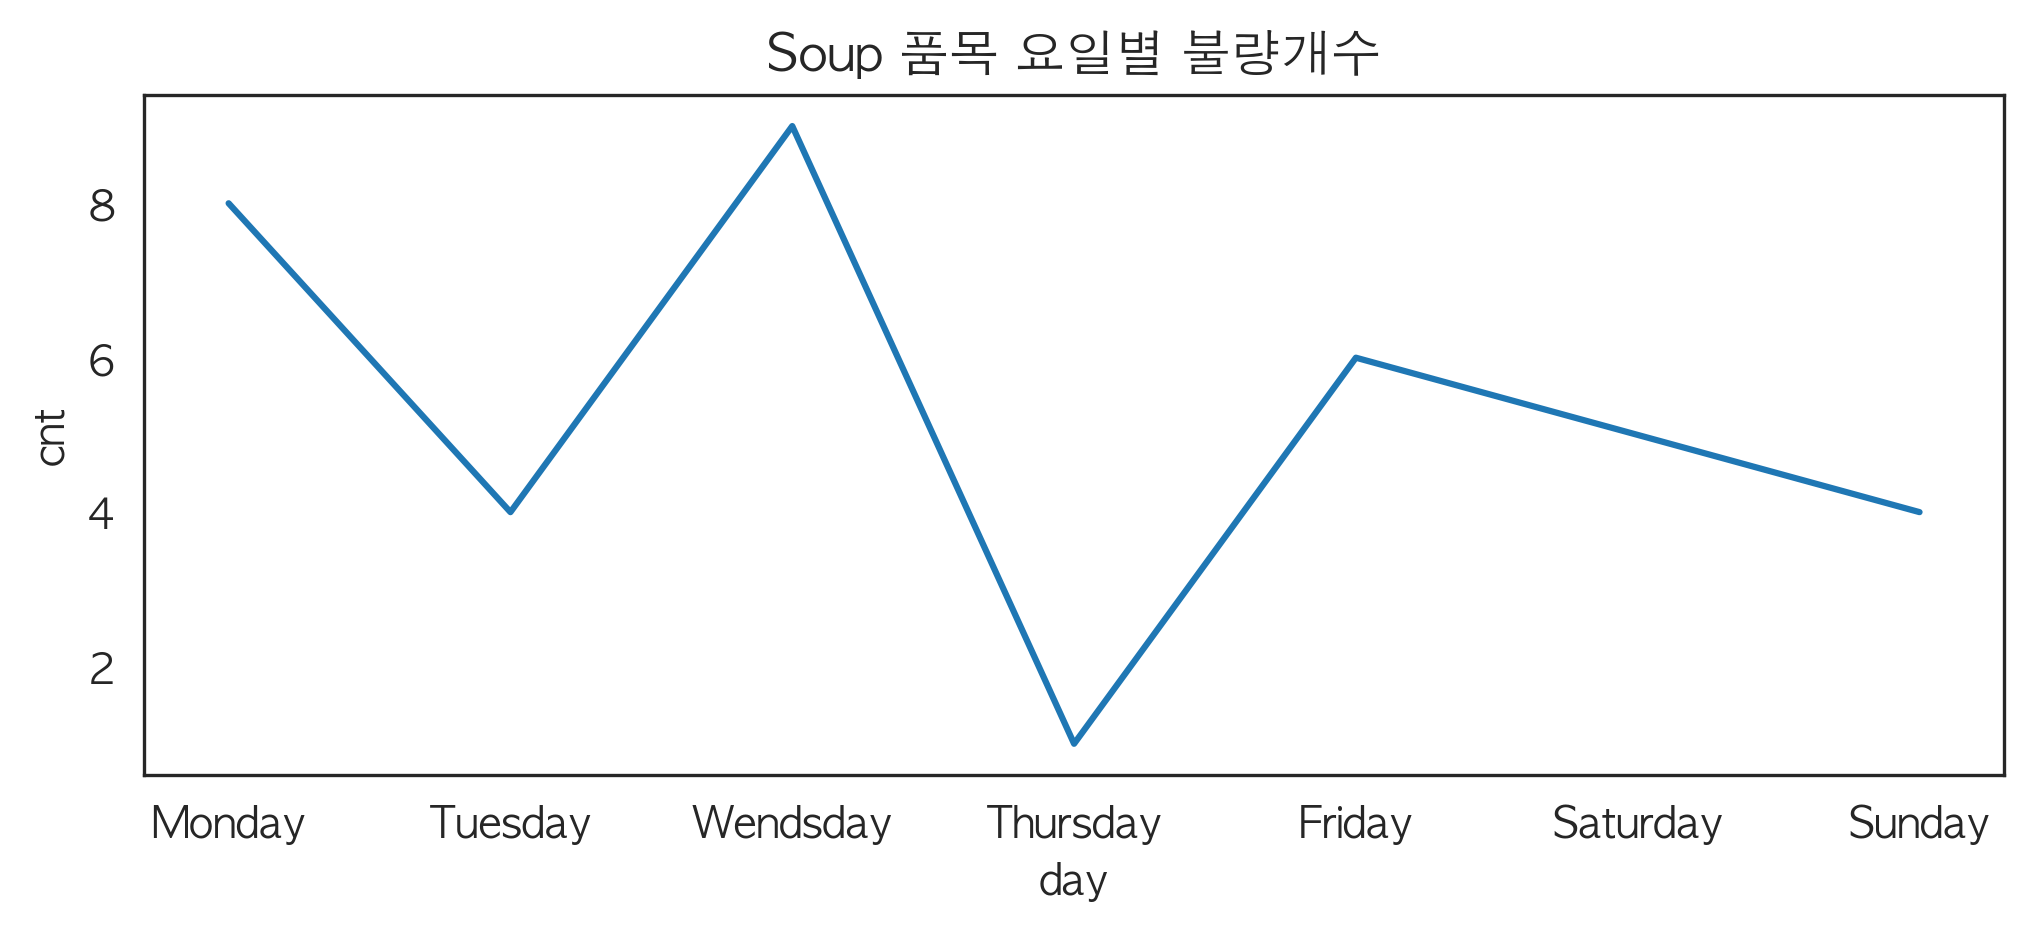

In [383]:
%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font', family='AppleGothic')

cook_s_x=cook[(cook['구분']=='soup')&(cook['불량']==1)]
data_=cook_s_x.groupby(by='day')['day'].count()
data_=pd.DataFrame(data_)

data_.rename(columns = {'day':'cnt'},inplace=True)

data_=data_.reset_index()

data_=data_.sort_values("day")

data_['day']=data_.apply(lambda x:index_to_string(x['day']),axis=1)
data_
plt.figure(figsize = (8,3),dpi=300)

palette = sns.color_palette('Paired',9)
p=sns.lineplot(x='day',y='cnt',data=data_,palette=palette)
p.set_title("Soup 품목 요일별 불량개수")
plt.show()
sns.set_style("white")

## Drink 품목 요일별 생산량, 불량 개수

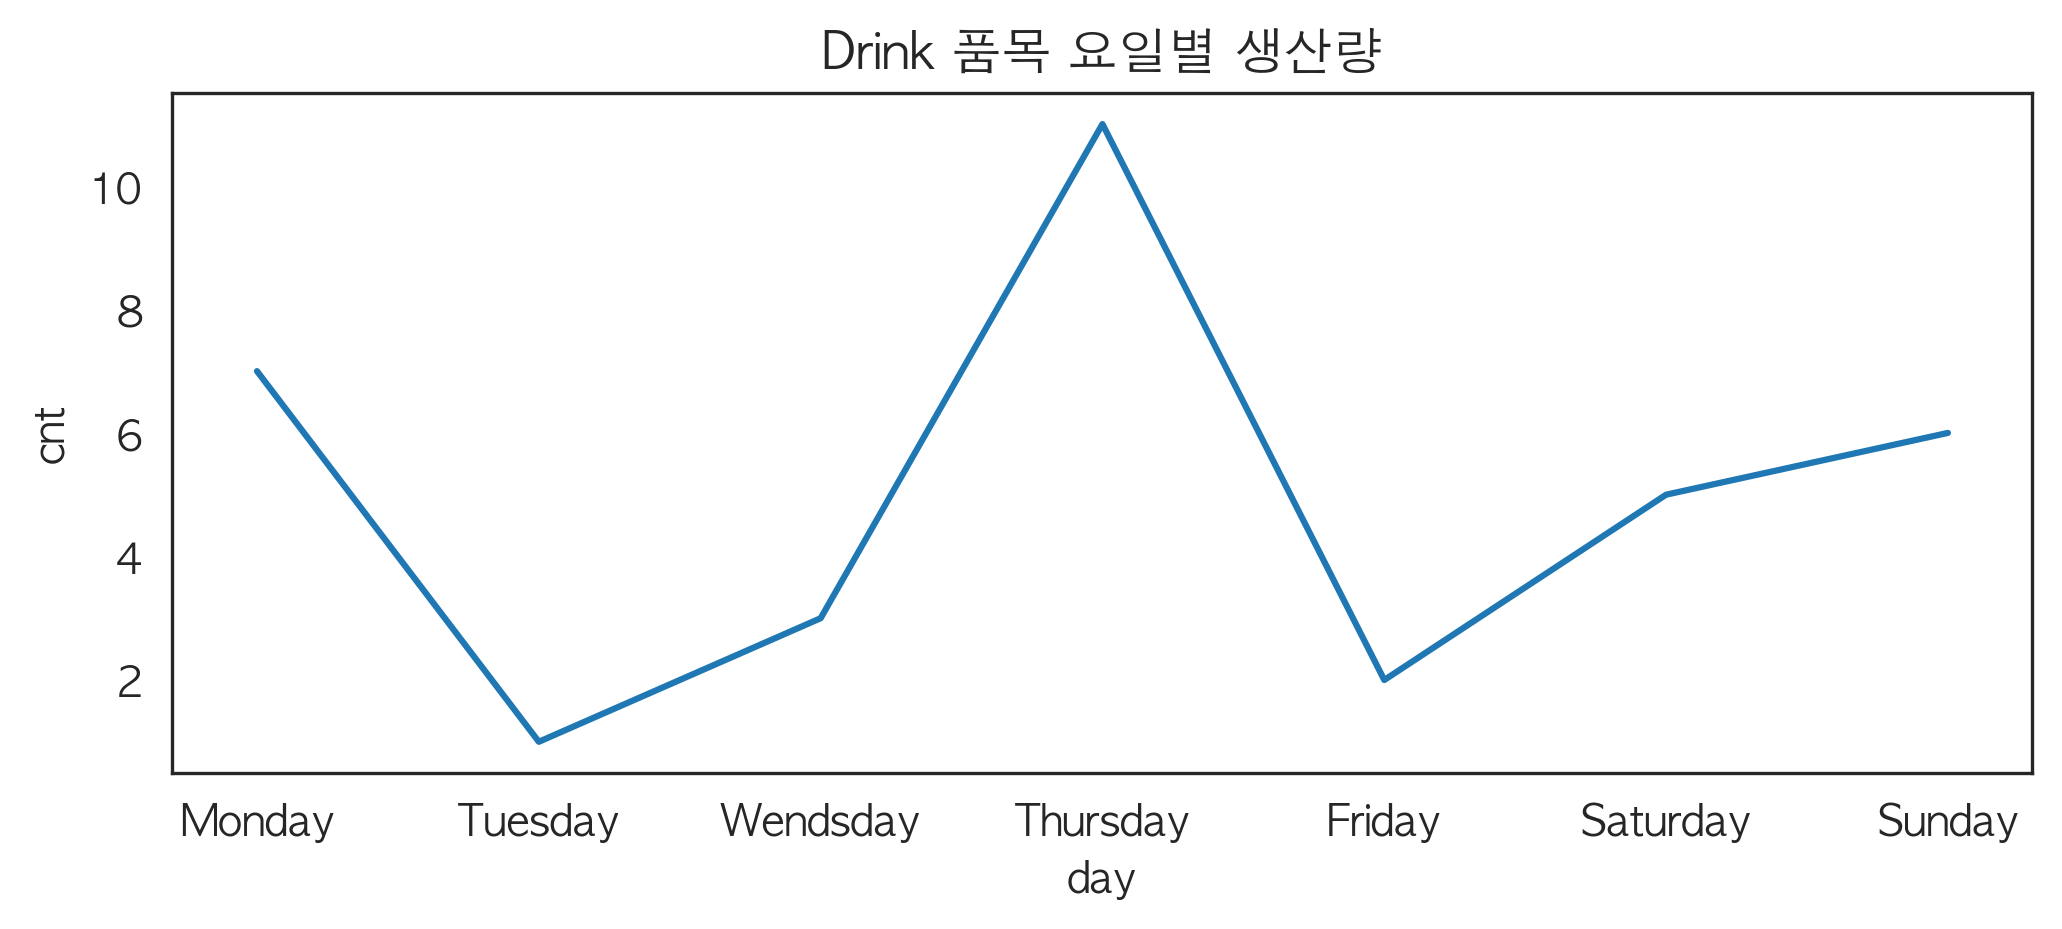

In [385]:
%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font', family='AppleGothic')

cook_s=cook[cook['구분']=='drink']
data_=cook_s.groupby(by='day')['day'].count()
data_=pd.DataFrame(data_)

data_.rename(columns = {'day':'cnt'},inplace=True)

data_=data_.reset_index()

data_=data_.sort_values("day")

data_['day']=data_.apply(lambda x:index_to_string(x['day']),axis=1)
data_
plt.figure(figsize = (8,3),dpi=300)

palette = sns.color_palette('Paired',9)
p=sns.lineplot(x='day',y='cnt',data=data_,palette=palette)
p.set_title("Drink 품목 요일별 생산량")
plt.show()
sns.set_style("white")

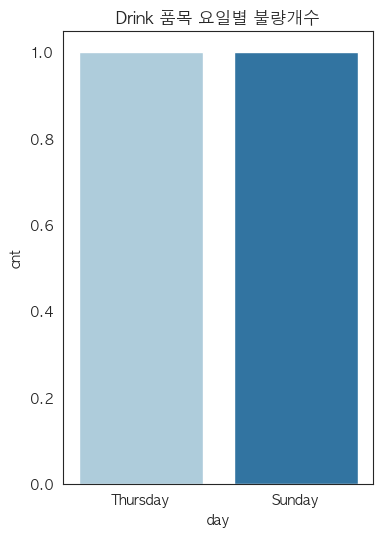

In [386]:
%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font', family='AppleGothic')

cook_s_x=cook[(cook['구분']=='drink')&(cook['불량']==1)]
data_=cook_s_x.groupby(by='day')['day'].count()
data_=pd.DataFrame(data_)

data_.rename(columns = {'day':'cnt'},inplace=True)

data_=data_.reset_index()

data_=data_.sort_values("day")

data_['day']=data_.apply(lambda x:index_to_string(x['day']),axis=1)
data_
plt.figure(figsize = (4,5),dpi=100)

palette = sns.color_palette('Paired',9)
p=sns.barplot(x='day',y='cnt',data=data_,palette=palette)
p.set_title("Drink 품목 요일별 불량개수")
plt.show()

# 검정

In [1]:
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [15]:
cook = pd.read_csv("cookingdata_version6.csv",encoding='euc-kr')
cook.rename(columns = {'불량여부':'불량'},inplace=True)
cook.rename(columns = {'발생시간파생':'오류발생시각'},inplace=True)
cook['오류발생시각'].value_counts()

def func1(row):
    if pd.isnull(row):
        return row
    
    if '소스' in row:
        return 'sauce'
    elif '드레싱' in row :
        return 'sauce'
    elif '마요' in row :
        return 'sauce'
    elif '밥' in row :
        return 'rice'
    elif '비빔밥' in row :
        return 'rice'
    elif '볶음밥' in row :
        return 'rice'
    elif '도시락' in row:
        return '도시락'
    elif '샐러드' in row:
        return 'salad'
    elif '베이스' in row:
        return 'soup'
    elif '국물' in row:
        return 'soup'
    elif '양념' in row:
        return 'sauce'
    elif '허브' in row:
        return 'sauce'
    elif '디핑' in row:
        return 'sauce'  
    elif '이마트 야채케' in row:
        return 'sauce'  
    elif '케찹' in row:
        return 'sauce'
    elif '참치액' in row:
        return 'sauce'  
    elif '시럽' in row:
        return 'sauce'  
    elif '머스타드' in row:
        return 'sauce'  
    elif '에이드' in row:
        return 'drink'
    elif '머스타드' in row:
        return 'sauce'
    elif '요리당' in row:
        return 'sauce'
    elif '멸치' in row:
        return 'soup'
    elif '감자무스' in row:
        return 'salad'
    elif '머스타드' in row:
        return 'sauce'
    elif '사골' in row:
        return 'soup'
    elif '사이다' in row:
        return 'drink'
    elif '쉐프메이드' in row:
        return 'sauce'
    elif '사골' in row:
        return 'soup'
    elif '사우전아일랜드' in row:
        return 'sauce'
    elif '데미그라스' in row:
        return 'sauce'
    elif '육수' in row:
        return 'soup'
    elif 'SAUCE' in row:
        return 'sauce'
    elif '다시' in row:
        return 'soup'
    elif '수프' in row:
        return 'soup'
    elif '초고추장' in row:
        return 'sauce'
    elif '리조또' in row:
        return 'rice'
    elif '깔라만시' in row:
        return 'sauce'
    elif '케첩' in row:
        return 'sauce'
    elif '죽' in row:
        return 'soup'
    elif '데리야끼' in row:
        return 'sauce'
    
cook['구분'] = cook['품목명'].apply(func1)

df = cook[['구분','불량','충전실온도','실링온도','쿠킹온도','쿠킹스팀압력','실링압력']]
df.head()

,구분,불량,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력
0,sauce,양품,71.669853,96.769853,131.742003,23.315,201.844
1,salad,양품,70.386480,102.086480,136.926080,23.226,212.043
2,soup,양품,71.206130,112.306130,147.579680,23.516,208.781
3,salad,양품,70.430565,96.030565,131.569165,23.692,208.269
4,sauce,양품,72.179318,114.079318,149.928068,23.899,211.625


In [20]:
cook['구분'].value_counts()

sauce    11625
rice      9550
salad     1093
soup       875
drink       35
Name: 구분, dtype: int64

### 제품군 불량개수 및 비율

In [21]:
cook['불량'] = cook['불량'].replace('불량', 1).replace('양품', 0)

len_p1=cook.groupby('구분')['구분'].count()
len_p1=pd.DataFrame(len_p1)
len_p1.rename(columns={'구분':'개수'},inplace=True)
len_p1.reset_index(inplace=True)
len_p1

p1 = cook.pivot_table(index='구분' , values= '불량', aggfunc='sum').reset_index()
p1['비율'] = p1['불량'] / len_p1['개수']
p1

## salad 항목이 불량 비율이 가장 높다.

,구분,불량,비율
0,drink,2,0.057143
1,rice,428,0.044817
2,salad,53,0.048490
3,sauce,519,0.044645
4,soup,37,0.042286


### 비율전체불량개수 (전체불량개수 중 각 제품군별 불량률)

In [24]:
sum_all=sum(p1['불량'])

p1 = cook.pivot_table(index='구분' , values= '불량', aggfunc='sum').reset_index()
p1['비율_전체불량개수']=p1['불량']/sum_all
p1

,구분,불량,비율_전체불량개수
0,drink,2,0.001925
1,rice,428,0.411935
2,salad,53,0.051011
3,sauce,519,0.499519
4,soup,37,0.035611


In [32]:
# 분석에 필요한 데이터 추출
df = cook[['구분','불량','충전실온도','실링온도','쿠킹온도','쿠킹스팀압력','실링압력']]
df.head()

,구분,불량,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력
0,sauce,0,71.669853,96.769853,131.742003,23.315,201.844
1,salad,0,70.386480,102.086480,136.926080,23.226,212.043
2,soup,0,71.206130,112.306130,147.579680,23.516,208.781
3,salad,0,70.430565,96.030565,131.569165,23.692,208.269
4,sauce,0,72.179318,114.079318,149.928068,23.899,211.625


## Sauce

In [33]:
# sauce 데이터 추출
df_sauce = df[df['구분'] == 'sauce']
df_sauce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11625 entries, 0 to 23971
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      11625 non-null  object 
 1   불량      11625 non-null  int64  
 2   충전실온도   11625 non-null  float64
 3   실링온도    11625 non-null  float64
 4   쿠킹온도    11625 non-null  float64
 5   쿠킹스팀압력  11625 non-null  float64
 6   실링압력    11625 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 726.6+ KB


In [34]:
# 개수 확인
df_sauce['불량'].value_counts()

0    11106
1      519
Name: 불량, dtype: int64

In [35]:
# 데이터 구분
df_sauce_0 = df_sauce[df_sauce['불량'] == 0]
df_sauce_1 = df_sauce[df_sauce['불량'] == 1]
print(df_sauce_0.shape)
print(df_sauce_1.shape)
df_sauce_0.info()

(11106, 7)
(519, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11106 entries, 0 to 23971
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      11106 non-null  object 
 1   불량      11106 non-null  int64  
 2   충전실온도   11106 non-null  float64
 3   실링온도    11106 non-null  float64
 4   쿠킹온도    11106 non-null  float64
 5   쿠킹스팀압력  11106 non-null  float64
 6   실링압력    11106 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 694.1+ KB


## - 정규성 검정

In [36]:
# 각 변수의 정규성 검정
print('충전실온도')
print(shapiro(df_sauce_0['충전실온도']))
print(shapiro(df_sauce_1['충전실온도']))
print('실링온도')
print(shapiro(df_sauce_0['실링온도']))
print(shapiro(df_sauce_1['실링온도']))
print('쿠킹온도')
print(shapiro(df_sauce_0['쿠킹온도']))
print(shapiro(df_sauce_1['쿠킹온도']))
print('쿠킹스팀압력')
print(shapiro(df_sauce_0['쿠킹스팀압력']))
print(shapiro(df_sauce_1['쿠킹스팀압력']))
print('실링압력')
print(shapiro(df_sauce_0['실링압력']))
print(shapiro(df_sauce_1['실링압력']))

충전실온도
ShapiroResult(statistic=0.9922545552253723, pvalue=4.726276703471228e-24)
ShapiroResult(statistic=0.992190420627594, pvalue=0.0080498568713665)
실링온도
ShapiroResult(statistic=0.9737755060195923, pvalue=8.712433072093118e-41)
ShapiroResult(statistic=0.982289731502533, pvalue=5.983540631859796e-06)
쿠킹온도
ShapiroResult(statistic=0.9740803837776184, pvalue=1.3260347238059311e-40)
ShapiroResult(statistic=0.981916606426239, pvalue=4.7469970922975335e-06)
쿠킹스팀압력
ShapiroResult(statistic=0.9945407509803772, pvalue=4.1896559085317337e-20)
ShapiroResult(statistic=0.9418453574180603, pvalue=2.226062216503788e-13)
실링압력
ShapiroResult(statistic=0.9997649788856506, pvalue=0.2533387243747711)
ShapiroResult(statistic=0.9981508851051331, pvalue=0.8559389114379883)


## U test

In [37]:
# sauce의 불량 / 양품 - 충전실온도 
t_result_sauce_1 = stats.mannwhitneyu(df_sauce_0['충전실온도'],df_sauce_1['충전실온도'])
t, p = t_result_sauce_1.statistic.round(3), t_result_sauce_1.pvalue
t, p

(3763798.0, 3.907706383568055e-32)

## 2 sample t test

In [38]:
# sauce의 불량 / 양품 - 실링온도 
t_result_sauce_2 = stats.ttest_ind(df_sauce_0['실링온도'],df_sauce_1['실링온도'])
t, p = t_result_sauce_2.statistic.round(3), t_result_sauce_2.pvalue
t, p

(1.142, 0.2533925368476123)

In [39]:
# sauce의 불량 / 양품 - 쿠킹온도 
t_result_sauce_3 = stats.ttest_ind(df_sauce_0['쿠킹온도'],df_sauce_1['쿠킹온도'])
t, p = t_result_sauce_3.statistic.round(3), t_result_sauce_3.pvalue
t, p

(2.976, 0.0029294245047441704)

In [40]:
# sauce의 불량 / 양품 - 쿠킹스팀압력 
t_result_sauce_4 = stats.ttest_ind(df_sauce_0['쿠킹스팀압력'],df_sauce_1['쿠킹스팀압력'])
t, p = t_result_sauce_4.statistic.round(3), t_result_sauce_4.pvalue
t, p

(67.28, 0.0)

In [41]:
# sauce의 불량 / 양품 - 실링압력
t_result_sauce_5 = stats.ttest_ind(df_sauce_0['실링압력'],df_sauce_1['실링압력'])
t, p = t_result_sauce_5.statistic.round(3), t_result_sauce_5.pvalue
t, p

(36.234, 1.784502951118034e-272)

---

## Rice

In [42]:
# rice 데이터 추출
df_rice = df[df['구분'] == 'rice']
df_rice.shape

(9550, 7)

In [43]:
# 개수 확인
df_rice['불량'].value_counts()

0    9122
1     428
Name: 불량, dtype: int64

In [44]:
# 데이터 구분
df_rice_0 = df_rice[df_rice['불량'] == 0]
df_rice_1 = df_rice[df_rice['불량'] == 1]
print(df_rice_0.shape)
print(df_rice_1.shape)

(9122, 7)
(428, 7)


## - 정규성 검정

In [45]:
# 각 변수의 정규성 검정
print('충전실온도')
print(shapiro(df_rice_0['충전실온도']))
print(shapiro(df_rice_1['충전실온도']))
print('실링온도')
print(shapiro(df_rice_0['실링온도']))
print(shapiro(df_rice_1['실링온도']))
print('쿠킹온도')
print(shapiro(df_rice_0['쿠킹온도']))
print(shapiro(df_rice_1['쿠킹온도']))
print('쿠킹스팀압력')
print(shapiro(df_rice_0['쿠킹스팀압력']))
print(shapiro(df_rice_1['쿠킹스팀압력']))
print('실링압력')
print(shapiro(df_rice_0['실링압력']))
print(shapiro(df_rice_1['실링압력']))

충전실온도
ShapiroResult(statistic=0.9900480508804321, pvalue=8.92330662562968e-25)
ShapiroResult(statistic=0.9910771250724792, pvalue=0.011014343239367008)
실링온도
ShapiroResult(statistic=0.9729225635528564, pvalue=2.801705142306938e-38)
ShapiroResult(statistic=0.9800053238868713, pvalue=1.2447932931536343e-05)
쿠킹온도
ShapiroResult(statistic=0.973282516002655, pvalue=4.4494295085949813e-38)
ShapiroResult(statistic=0.9799133539199829, pvalue=1.1857435310957953e-05)
쿠킹스팀압력
ShapiroResult(statistic=0.9940329790115356, pvalue=4.607109083645385e-19)
ShapiroResult(statistic=0.9361238479614258, pvalue=1.3933482189212865e-12)
실링압력
ShapiroResult(statistic=0.9996453523635864, pvalue=0.09579470753669739)
ShapiroResult(statistic=0.9924635887145996, pvalue=0.02959391660988331)


충전실온도 : 만휘트니  
양품 : 정규   
불량 : 비정규 

----

실링온도 : 2sample t test  
양품 : 정규  
불량 : 정규  

---

쿠킹온도 : 2sample t test  
양품 : 정규  
불량 : 정규  

---

쿠킹스팀압력 : 2sample t test  
양품 : 정규  
불량 : 정규  

---

실링압력 : 만휘트니    
양품 : 정규  
불량 : 비정규  

## - U test

In [46]:
# rice의 불량 / 양품 - 충전실온도 
t_result_rice_1 = stats.mannwhitneyu(df_rice_0['충전실온도'],df_rice_1['충전실온도'])
t, p = t_result_rice_1.statistic.round(3), t_result_rice_1.pvalue
t, p

(2645377.0, 1.6544982775796203e-35)

## - 2 sample t test

In [47]:
# rice의 불량 / 양품 - 실링온도 
t_result_rice_2 = stats.ttest_ind(df_rice_0['실링온도'],df_rice_1['실링온도'])
t, p = t_result_rice_2.statistic.round(3), t_result_rice_2.pvalue
t, p

(-1.099, 0.2716065711121842)

In [48]:
# rice의 불량 / 양품 - 쿠킹온도 
t_result_rice_3 = stats.ttest_ind(df_rice_0['쿠킹온도'],df_rice_1['쿠킹온도'])
t, p = t_result_rice_3.statistic.round(3), t_result_rice_3.pvalue
t, p

(0.586, 0.5580766598533979)

In [49]:
# rice의 불량 / 양품 - 쿠킹스팀압력 
t_result_rice_4 = stats.ttest_ind(df_rice_0['쿠킹스팀압력'],df_rice_1['쿠킹스팀압력'])
t, p = t_result_rice_4.statistic.round(3), t_result_rice_4.pvalue
t, p

(61.544, 0.0)

In [50]:
# rice의 불량 / 양품 - 실링압력 
t_result_sauce_5 = stats.mannwhitneyu(df_rice_0['실링압력'],df_rice_1['실링압력'])
t, p = t_result_sauce_5.statistic.round(3), t_result_sauce_5.pvalue
t, p

(3420327.5, 6.961698557029223e-153)

## 카이제곱 검정

## X : 오류발생시각 / Y: 제품군별

제품군별 오류발생시각에 차이가 있다.

In [462]:
cook=pd.read_csv("Cooking.csv",encoding='euc-kr')
cook.rename(columns = {'불량여부':'불량'},inplace=True)
cook.rename(columns = {'발생시간파생':'오류발생시각'},inplace=True)
cook.head()

,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,...,생산일자,불량,발생시간,오류발생시각,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명,구분
0,3,C001,쿠커 #1,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,...,2021-01-03,0,0,0,0,0.0,0,0,0,sauce
1,1,C002,쿠커 #2,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,...,2021-01-03,0,0,0,0,0.0,0,0,0,salad
2,13,C003,쿠커 #3,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,...,2021-01-03,0,0,0,0,0.0,0,0,0,soup
3,7,C005,2동 쿠커 #4,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,...,2021-01-03,0,0,0,0,0.0,0,0,0,salad
4,2,C007,프리머 #1,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179318,114.079318,149.928068,23.899,...,2021-01-03,0,0,0,0,0.0,0,0,0,sauce


In [464]:
cook['불량'] = cook['불량'].replace('불량', 1).replace('양품', 0)
cook.head()


,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,...,생산일자,불량,발생시간,오류발생시각,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명,구분
0,3,C001,쿠커 #1,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,...,2021-01-03,0,0,0,0,0.0,0,0,0,sauce
1,1,C002,쿠커 #2,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,...,2021-01-03,0,0,0,0,0.0,0,0,0,salad
2,13,C003,쿠커 #3,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,...,2021-01-03,0,0,0,0,0.0,0,0,0,soup
3,7,C005,2동 쿠커 #4,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,...,2021-01-03,0,0,0,0,0.0,0,0,0,salad
4,2,C007,프리머 #1,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179318,114.079318,149.928068,23.899,...,2021-01-03,0,0,0,0,0.0,0,0,0,sauce


In [467]:
index1 = cook[cook['불량']==0].index
cook.drop(index1,inplace=True)

,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,...,생산일자,불량,발생시간,오류발생시각,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명,구분
10,10,D004,PET병,13D02080,참깨흑임자드레싱,W005,71.125831,93.425831,127.878281,22.968,...,2021-01-03,1,14:16,14,14:24,8.0,W0056B4,위치조정실패,충전실,sauce
43,7,D011,2동 오리히로,16A01016,시아스고구마샐러드믹스,W005,71.587470,103.987470,138.736120,23.166,...,2021-01-04,1,18:54,18,19:03,9.0,W005711,대기,충전실,salad
47,2,C002,쿠커 #2,23K01321,나가사키베이스(재),W003,70.540995,102.440995,137.135195,23.129,...,2021-01-05,1,9:51,9,9:58,7.0,W003452,충진 오류,쿠킹실,soup
71,13,P004,PET#1,13R02051,이마트베스트돈까스소스,W007,71.401189,111.901189,146.585739,23.123,...,2021-01-05,1,18:20,18,20:44,144.0,W0076B2,구동부,포장실,sauce
125,17,C004,쿠커 #4,23D02080,참깨흑임자드레싱(재),W003,70.649333,105.149333,139.680183,23.021,...,2021-01-10,1,22:32,22,1:16,164.0,W003721,충진 오류,쿠킹실,sauce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,2,D0036,로타리 #5,16B06061,천년풍미퓨어마요네즈1kg,W005,71.865935,105.165935,139.863435,23.132,...,2021-10-22,1,12:30,12,18:34,364.0,W005712,공정 과부하,충전실,sauce
23943,3,D084,2동 로타리#4,13A00725,샘표강된장양념,W005,71.671267,112.571266,147.339967,23.179,...,2021-10-25,1,9:46,9,11:49,123.0,W005713,수리,충전실,sauce
23945,1,C045,쿠커 #5,23U02003,유기아가베시럽665g/올가홀(재),W003,69.827929,86.927929,121.388229,22.974,...,2021-10-25,1,8:58,8,9:04,6.0,W003446,산도(ph) 이상,쿠킹실,sauce
23963,1,D005,3.2마요,16B06099,맛있는골드마요네즈3.2kg,W005,71.764168,108.664168,142.862968,22.799,...,2021-10-28,1,10:50,10,11:06,16.0,W0058Z9,기타,충전실,sauce


In [459]:
kind = pd.crosstab(index = cook['오류발생시각'], columns = cook['구분'] )
kind.head()

구분,drink,rice,salad,sauce,soup
오류발생시각,,,,,
1,0,20,0,3,1
2,0,17,1,8,0
3,0,9,1,8,0
4,0,15,0,5,0
5,0,15,1,6,1


In [468]:
chi, pval, dof, expected = stats.chi2_contingency(kind.T)

print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.3f}'.format(pval))
print('degree f freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 1116.988
p : 0.000
degree f freedom : 808
expected value : 
[[3.344500e+01 1.200000e-02 6.000000e-03 ... 2.000000e-03 2.000000e-03
  2.000000e-03]
 [9.125610e+03 3.296000e+00 1.648000e+00 ... 4.120000e-01 4.120000e-01
  4.120000e-01]
 [1.044429e+03 3.770000e-01 1.890000e-01 ... 4.700000e-02 4.700000e-02
  4.700000e-02]
 [1.110840e+04 4.012000e+00 2.006000e+00 ... 5.020000e-01 5.020000e-01
  5.020000e-01]
 [8.361160e+02 3.020000e-01 1.510000e-01 ... 3.800000e-02 3.800000e-02
  3.800000e-02]]


결론: 카이제곱검정결과 오류발생시각은 유의미한 변수임을 확인

## X: 오류발생시각 Y: 불량 건수
불량건수에 따라 오류발생시각이 차이가 있다.

In [396]:
kind = pd.crosstab(index = cook['오류발생시각'], columns = cook['불량'] )
kind.head()

불량,0,1
오류발생시각,,
0,22900,0
1,0,24
2,0,26
3,0,18
4,0,21


In [397]:
chi, pval, dof, expected = stats.chi2_contingency(kind.T)

print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.3f}'.format(pval))
print('degree f freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 23972.000
p : 0.000
degree f freedom : 24
expected value : 
[[2.1875939e+04 2.2927000e+01 2.4837000e+01 1.7195000e+01 2.0061000e+01
  2.2927000e+01 2.4837000e+01 2.5793000e+01 6.7825000e+01 7.9288000e+01
  6.3049000e+01 7.3557000e+01 4.3943000e+01 7.4512000e+01 7.6422000e+01
  4.7764000e+01 5.2540000e+01 5.0630000e+01 3.7256000e+01 5.3496000e+01
  2.5793000e+01 3.5345000e+01 2.2927000e+01 2.5793000e+01 3.5345000e+01]
 [1.0240610e+03 1.0730000e+00 1.1630000e+00 8.0500000e-01 9.3900000e-01
  1.0730000e+00 1.1630000e+00 1.2070000e+00 3.1750000e+00 3.7120000e+00
  2.9510000e+00 3.4430000e+00 2.0570000e+00 3.4880000e+00 3.5780000e+00
  2.2360000e+00 2.4600000e+00 2.3700000e+00 1.7440000e+00 2.5040000e+00
  1.2070000e+00 1.6550000e+00 1.0730000e+00 1.2070000e+00 1.6550000e+00]]


결론: 카이제곱검정결과 오류발생시각은 유의미한 변수임을 확인

## X: 오류발생작업장명 Y: 구분
제품군(구분)에 따라 오류발생작업장의 차이가 있을 것이다.

In [489]:
cook=pd.read_csv("Cooking.csv",encoding='euc-kr')
cook.rename(columns = {'불량여부':'불량'},inplace=True)
cook.rename(columns = {'발생시간파생':'오류발생시각'},inplace=True)

In [493]:
df1 = cook['불량'] == 1
df2 = cook[df1]

In [491]:
df3= df2.pivot_table(index='구분', columns='오류발생작업장명', fill_value=0, aggfunc='size')
df3.head()

오류발생작업장명,계량실,충전실,쿠킹실,포장실
구분,,,,
drink,0,0,2,0
rice,1,307,115,5
salad,0,32,20,1
sauce,10,214,202,93
soup,1,15,20,1


In [492]:
chi, pval, dof, expected = stats.chi2_contingency(df3)

print("chi-square test")
print("chisq : %.3f"%chi)
print("p : %f"%pval)
print("dgree of freedom : %.3f"%dof)
# print("expected value : \n{}".format(expected.round(3)))

chi-square test
chisq : 141.026
p : 0.000000
dgree of freedom : 12.000


결론: 카이제곱검정결과 오류발생작업장명은 유의미한 변수임을 확인

## X: 요일별, Y: 불량양품 건수
요일별 품질수준이 다르다. (특정 요일에서는 양품이, 다른날은 불량이 많이 나올 것이다)

In [504]:
df = pd.DataFrame(cook.groupby(['불량','day'])[['day']].count())

df.index = df.index.set_names(['불량', 'day_'])
df = df.reset_index()  

df = df.pivot_table(index='day_',columns='불량',values='day',fill_value=0)
df

chi,pvalue,dof,expected=stats.chi2_contingency(df)
chi,pvalue.round(3),dof,expected


(9.436808803442377,
 0.15,
 6,
 array([[3076.00533956,  143.99466044],
        [3953.90872685,  185.09127315],
        [4358.94793926,  204.05206074],
        [4561.46754547,  213.53245453],
        [3662.54797263,  171.45202737],
        [1825.54229935,   85.45770065],
        [1461.58017687,   68.41982313]]))

카이제곱 검정 결과 요일별 품질 수준이 다르지 않다.

## X: 에러메세지, Y: 구분
구분별 에러메세지 빈도 차이가 있다.

In [505]:
cook_x=cook[cook['불량']==1]
cook_x=cook_x[cook_x['Error_Message']!='기타']

kind=pd.crosstab(index=cook_x['Error_Message'],columns=cook_x['구분'])
kind

chi,pvalue,dof,expected=stats.chi2_contingency(kind)
chi,pvalue.round(3),dof,expected
#p<0.05  유의미

(1432.5985281871458,
 0.0,
 308,
 array([[1.12107623e-03, 4.68609865e-01, 4.37219731e-02, 4.57399103e-01,
         2.91479821e-02],
        [1.12107623e-02, 4.68609865e+00, 4.37219731e-01, 4.57399103e+00,
         2.91479821e-01],
        [2.80269058e-02, 1.17152466e+01, 1.09304933e+00, 1.14349776e+01,
         7.28699552e-01],
        [1.12107623e-03, 4.68609865e-01, 4.37219731e-02, 4.57399103e-01,
         2.91479821e-02],
        [1.12107623e-03, 4.68609865e-01, 4.37219731e-02, 4.57399103e-01,
         2.91479821e-02],
        [4.48430493e-03, 1.87443946e+00, 1.74887892e-01, 1.82959641e+00,
         1.16591928e-01],
        [4.04708520e-01, 1.69168161e+02, 1.57836323e+01, 1.65121076e+02,
         1.05224215e+01],
        [2.24215247e-03, 9.37219731e-01, 8.74439462e-02, 9.14798206e-01,
         5.82959641e-02],
        [5.60538117e-03, 2.34304933e+00, 2.18609865e-01, 2.28699552e+00,
         1.45739910e-01],
        [1.12107623e-03, 4.68609865e-01, 4.37219731e-02, 4.57399103e-01,
   

## 구분별 에러메세지 빈도

[Text(0, 0, '위치조정실패'),
 Text(1, 0, '대기'),
 Text(2, 0, '충진 오류'),
 Text(3, 0, '구동부'),
 Text(4, 0, '노즐'),
 Text(5, 0, '포장지 인쇄 불량'),
 Text(6, 0, '온도 상승 지연'),
 Text(7, 0, '전처리'),
 Text(8, 0, '배합 실패 오류'),
 Text(9, 0, 'PSD패킹 교체'),
 Text(10, 0, '교체'),
 Text(11, 0, '불량교체'),
 Text(12, 0, '그립퍼'),
 Text(13, 0, '씰바 셋팅'),
 Text(14, 0, '냉각'),
 Text(15, 0, '제품 넘침 청소'),
 Text(16, 0, '원료'),
 Text(17, 0, '장비 오염'),
 Text(18, 0, '컨베이어'),
 Text(19, 0, '규격보정'),
 Text(20, 0, '감도'),
 Text(21, 0, '실바'),
 Text(22, 0, '센서 이상 감지'),
 Text(23, 0, '미포장'),
 Text(24, 0, '업체미입고(재료 미입고)'),
 Text(25, 0, '생산 순서 오류'),
 Text(26, 0, '펌프이상'),
 Text(27, 0, '은박교체'),
 Text(28, 0, '밸브'),
 Text(29, 0, '공정 과부하'),
 Text(30, 0, '분사노즐'),
 Text(31, 0, '냉동품 투입'),
 Text(32, 0, '압축 오류'),
 Text(33, 0, '진공'),
 Text(34, 0, '6열컵실러'),
 Text(35, 0, '보일러 꺼짐'),
 Text(36, 0, '색상 이상'),
 Text(37, 0, '점도이상'),
 Text(38, 0, '업체미입고(용기 미입고)'),
 Text(39, 0, '냉각(칠러)'),
 Text(40, 0, '대차 적재 공간 부족'),
 Text(41, 0, '전기설비오류'),
 Text(42, 0, '박스 준비'),
 Text(43, 0, 

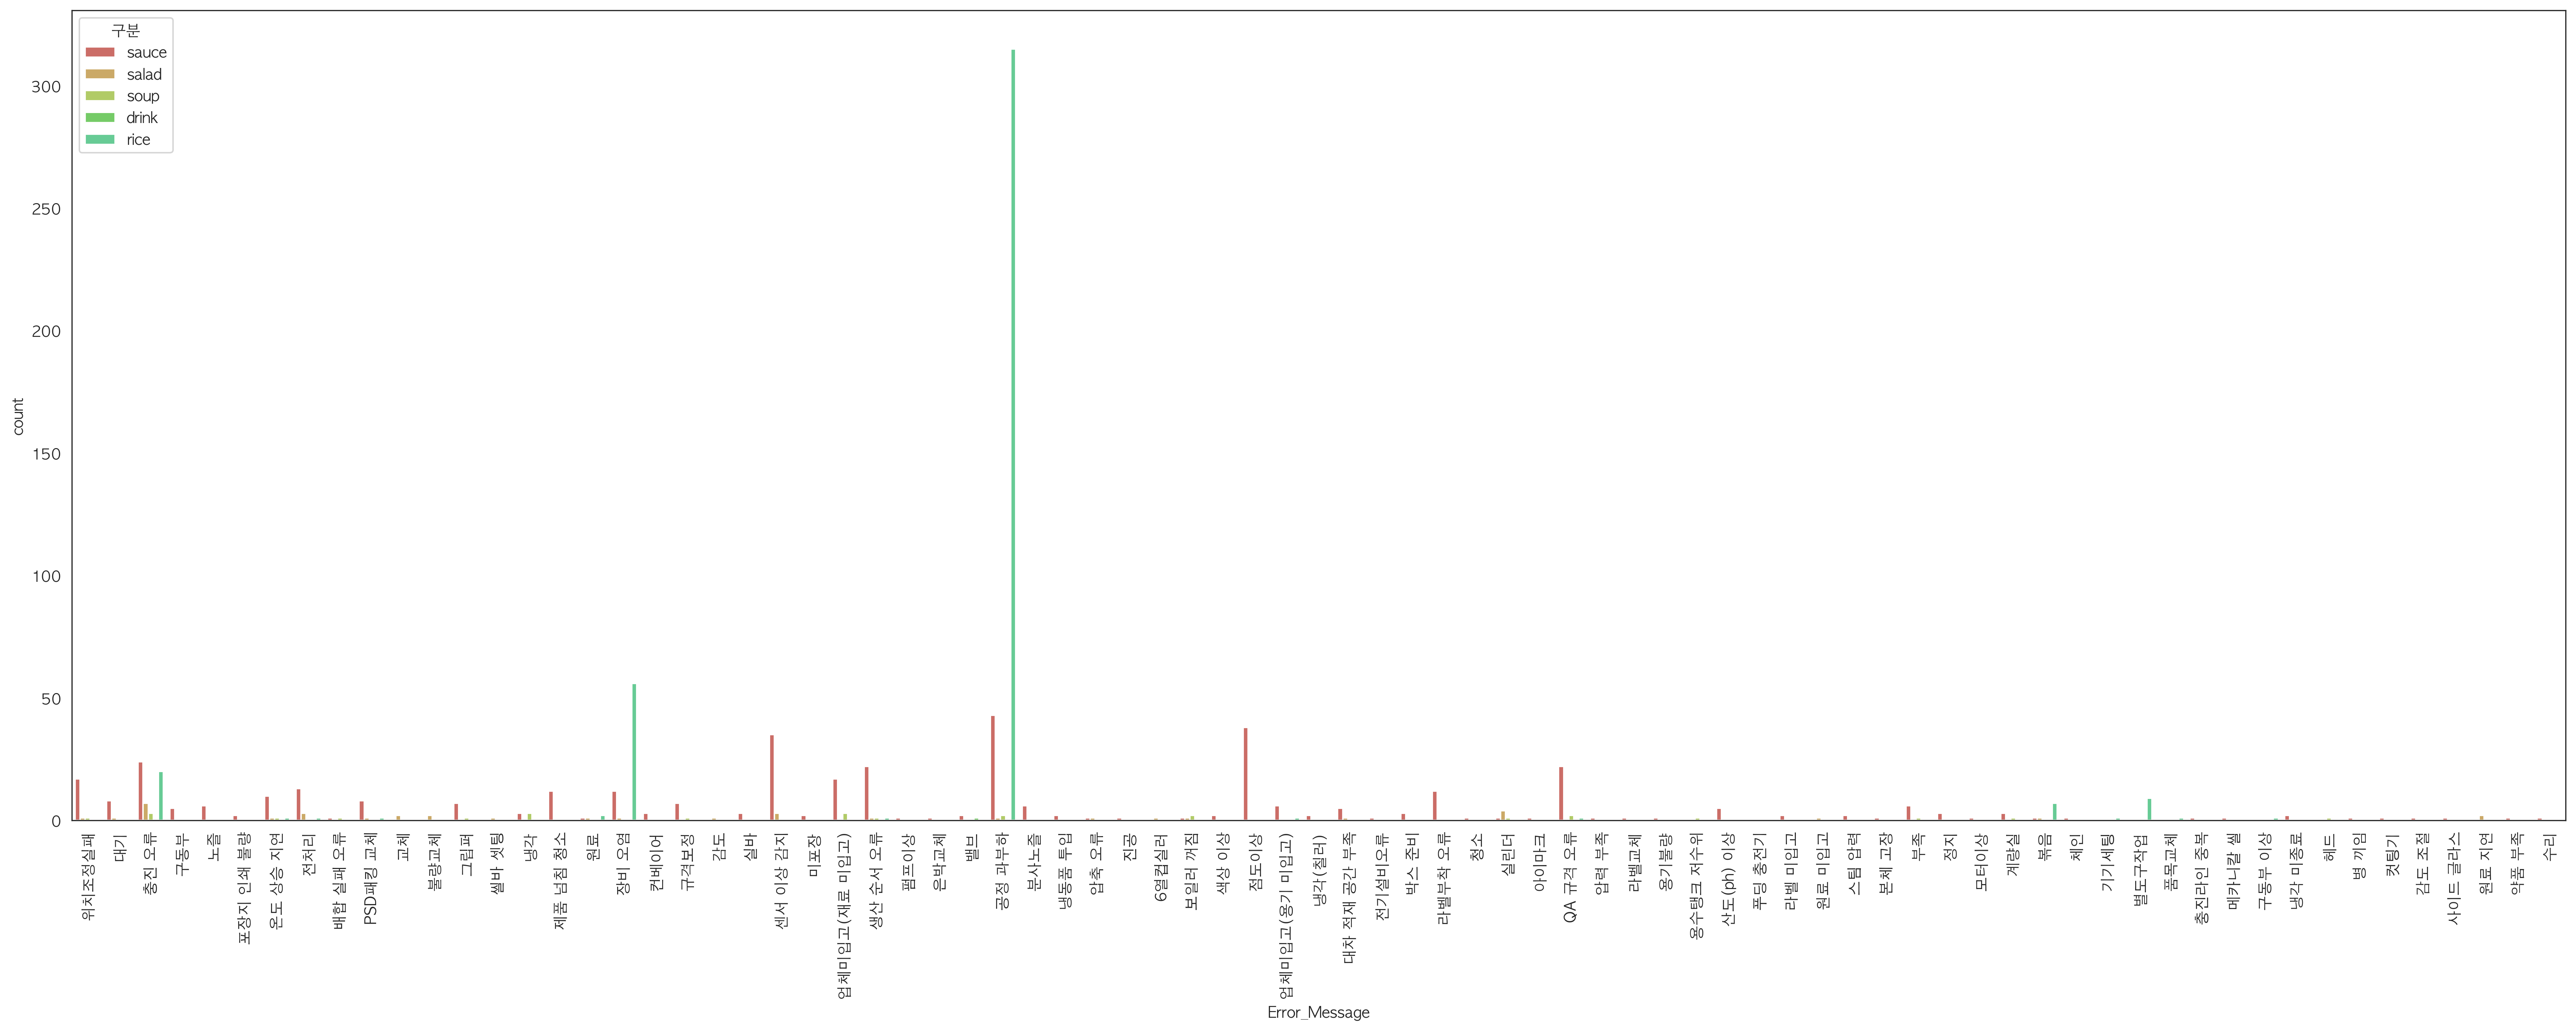

In [507]:
%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font', family='AppleGothic')

plt.figure(figsize = (30,10),dpi=300)
palette = sns.color_palette('hls',10)
ax=sns.countplot(x=cook_x['Error_Message'],hue='구분',data=cook_x,palette=palette)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [508]:
x=cook_x.groupby(['구분','Error_Message'])['Error_Message'].count()
x.index = x.index.set_names(['구분', 'Error_Message_'])
x=pd.DataFrame(x).reset_index()
x

,구분,Error_Message_,Error_Message
0,drink,밸브,1
1,rice,PSD패킹 교체,1
2,rice,QA 규격 오류,1
3,rice,공정 과부하,315
4,rice,구동부 이상,1
...,...,...,...
116,soup,온도 상승 지연,1
117,soup,용수탱크 저수위,1
118,soup,위치조정실패,1
119,soup,충진 오류,3


In [509]:
x[x['구분']=='drink']

,구분,Error_Message_,Error_Message
0,drink,밸브,1


In [510]:
max_=max(x[x['구분']=='rice']['Error_Message'])
x[(x['구분']=='rice')&(x['Error_Message']==315)]

,구분,Error_Message_,Error_Message
3,rice,공정 과부하,315


In [511]:
max_=max(x[x['구분']=='sauce']['Error_Message'])
max_
x[(x['구분']=='sauce')&(x['Error_Message']==max_)]

,구분,Error_Message_,Error_Message
43,sauce,공정 과부하,43


In [512]:
max_=max(x[x['구분']=='salad']['Error_Message'])
x[(x['구분']=='salad')&(x['Error_Message']==max_)]

,구분,Error_Message_,Error_Message
38,salad,충진 오류,7


In [513]:
max_=max(x[x['구분']=='soup']['Error_Message'])
x[(x['구분']=='soup')&(x['Error_Message']==max_)]

,구분,Error_Message_,Error_Message
109,soup,냉각,3
115,soup,업체미입고(재료 미입고),3
119,soup,충진 오류,3


- rice 는 공정과부하에서
- soup 는 충진오류,냉각, 업체미입고(3건으로 공통)에서 
- sauce 는 공정과부하에서
- dirnk 는 밸브에서
- salad 는 충진오류에서 

----------

# Booking

In [305]:
# booking_data_version5 : Lead Time 추가한 최신 버전 데이터
# booking_version2 : 원천데이터

In [346]:
book_new = pd.read_csv("booking_data_version5.csv")
book_new = book_new.iloc[:,1:]
book_new.head()

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,Lead time,Year1,Year2
0,A,2015-12-14,441,SI0298,16A01039,NaN,5,3630.0,16500.0,1650,Y,2015-12-15,1.0,2015.0,2015
1,A,2015-12-14,443,SI0298,16D01021,NaN,100,5400.0,540000.0,0,Y,2015-12-15,1.0,2015.0,2015
2,B4,2015-12-14,2,IJ9455,1S101004,NaN,922,5200.0,567273.0,56727,Y,2015-12-14,0.0,2015.0,2015
3,A,2015-12-14,451,SI0346,1BA04019,NaN,40,310.0,45091.0,4509,Y,2015-12-15,1.0,2015.0,2015
4,A,2015-12-14,452,SI0346,1BA04001,NaN,18,1550.0,22546.0,2254,Y,2015-12-15,1.0,2015.0,2015


In [393]:
book_raw = pd.read_csv("Booking_data_version2.csv",encoding = 'utf - 8')
book_raw = book_raw.iloc[:,1:]
book_raw

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자
0,A,20151214,441,SI0298,sc600,16A01039,5,5,3630.00,16500.0,1650,Y,20151215
1,A,20151214,443,SI0298,sc600,16D01021,100,100,5400.00,540000.0,0,Y,20151215
2,B4,20151214,2,IJ9455,400,1S101004,922,922,5200.00,567273.0,56727,Y,20151214
3,A,20151214,451,SI0346,sc600,1BA04019,40,40,310.00,45091.0,4509,Y,20151215
4,A,20151214,452,SI0346,sc600,1BA04001,18,18,1550.00,22546.0,2254,Y,20151215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653815,A,20211102,150,IJ9548,sc600,16B06095,0,256,7723.00,561673.0,56167,N,20211103
1653816,B4,20211104,1,IA1406,400,13A00748,0,200,9800.00,1960000.0,196000,N,20211105
1653817,B4,20211104,2,IA1406,400,18A03045,0,30,8400.00,252000.0,25200,N,20211105
1653818,C,20211030,113,IJ9780,400,16A03015,0,1,4405.76,4406.0,0,Y,20211031


In [396]:
#2016년도부터 5년치 데이터
df = book_raw[book_raw['수주일자'] >= 20160000]
df['출하여부'] = df['출하완료여부'].replace('N', 1).replace('Y', 0)

## 각 수주품목코드 수주수량KG

In [397]:
p1 = df.pivot_table(index='수주품목코드' , values= '수주수량KG', aggfunc='sum').reset_index()
p1.sort_values(by = '수주수량KG',ascending = False)

,수주품목코드,수주수량KG
1874,16B03002,5868214
2943,1S101003,3563169
1788,16A02023,2616134
2150,1BA03051,2487155
1890,16B06003,2133900
...,...,...
3093,54300062,0
3044,54101621,0
3009,53A00602,0
3042,54101619,0


## 각 수주사업장별 출하여부 비율

In [399]:
df['수주사업장'].value_counts() #C가 가장 많음

C     808242
A     214074
B4      5818
B       2738
B3       518
D          2
Name: 수주사업장, dtype: int64

In [401]:
plist = [213074,2738,518,5818,808243,2]
p3 = df.pivot_table(index = '수주사업장' , values = ['출하여부'], aggfunc='sum').reset_index()

p3['비율'] = p3['출하여부'] / plist
p3.sort_values(by = '비율',ascending = False)

p3.drop([1,2,3,5])# D,B,B4는 표본이 적어 의미없어서 삭제

,수주사업장,출하여부,비율
0,A,137,0.000643
4,C,5218,0.006456


## 각 수주품목코드 출하여부 비율

In [398]:
p2 = df.pivot_table(index = '수주품목코드' , values = '출하여부', aggfunc = 'sum').reset_index()
p2['비율'] = p2['출하여부'] / len(p2['출하여부'])
p2.sort_values(by = '비율',ascending = False)

,수주품목코드,출하여부,비율
1743,16A01062,80,0.022786
1744,16A01063,80,0.022786
1814,16A03020,67,0.019083
60,13A00539,53,0.015095
1471,13R13005,50,0.014241
...,...,...,...
1363,13R08021,0,0.000000
1365,13R08023,0,0.000000
1366,13R08024,0,0.000000
1367,13R08025,0,0.000000


## 수주수량 & 출하완료여부

### 출하완료여부가 N인것

In [348]:
book = book_raw[book_raw['출하완료여부']=='N']
book

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자
311,C,20200521,239,IK0967,NaN,18A03029,0,83,6000.0,1080000.0,108000,N,20200522
873,C,20200522,86,IJ1739,400,13R08022,586,586,2151.0,3938481.0,393848,N,20200523
752536,C,20200525,286,IA1406,400,1BA03443,1236,1344,1570.0,5275200.0,527520,N,20200526
759019,C,20210405,291,IJ9543,400,1BA03023,636,720,2600.0,1872000.0,187200,N,20210406
765097,C,20201115,140,IK2137,202,16A01092,90,90,5990.0,539100.0,53910,N,20201115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653814,A,20211102,149,IJ9548,sc600,1BA03681,0,38,1485.0,168750.0,16875,N,20211103
1653815,A,20211102,150,IJ9548,sc600,16B06095,0,256,7723.0,561673.0,56167,N,20211103
1653816,B4,20211104,1,IA1406,400,13A00748,0,200,9800.0,1960000.0,196000,N,20211105
1653817,B4,20211104,2,IA1406,400,18A03045,0,30,8400.0,252000.0,25200,N,20211105


### Sauce & Rice 수주

In [354]:
prod = pd.read_csv("Product_Name.csv")
prod = prod.loc[:,'품목코드':'품목명']
prod = prod.dropna()

In [355]:
prod.rename(columns={'품목코드':'수주품목코드'},inplace=True)

### 원천데이터와 제품데이터 데이터 '수주품목코드'를 기준으로 병합

In [356]:
bmerge=book_raw.merge(prod,on='수주품목코드')
bmerge['출하완료여부'] = bmerge['출하완료여부'].replace('N', 1).replace('Y', 0)
bmerge

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,품목명
0,A,20151214,441,SI0298,sc600,16A01039,5,5,3630.0,16500.0,1650,0,20151215,시아스고구마샐러드S
1,C,20151214,163,IJ9455,400,16A01039,525,525,2745.0,1441125.0,144113,0,20151215,시아스고구마샐러드S
2,A,20161019,7,IJ1693,sc600,16A01039,30,30,3513.0,95810.0,9580,0,20161020,시아스고구마샐러드S
3,C,20151215,61,IJ9455,400,16A01039,170,170,2745.0,466650.0,46665,0,20151216,시아스고구마샐러드S
4,A,20151215,144,IJ9449,sc600,16A01039,50,50,3520.0,160000.0,16000,0,20151216,시아스고구마샐러드S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092788,A,20211101,195,SI0106,NaN,1BA03681,38,38,1300.0,147728.0,14772,0,20211102,(1)NEW새우볶음밥300g(칼로스쌀)
1092789,A,20211101,211,SI0107,NaN,1BA03681,15,15,1230.0,55910.0,5590,0,20211102,(1)NEW새우볶음밥300g(칼로스쌀)
1092790,C,20211102,196,IJ9455,202,1BA03681,0,83,1050.0,288750.0,28875,1,20211102,(1)NEW새우볶음밥300g(칼로스쌀)
1092791,A,20211102,138,IJ9449,NaN,1BA03681,0,23,1390.0,94773.0,9477,1,20211103,(1)NEW새우볶음밥300g(칼로스쌀)


In [357]:
def pclass(row):
    if pd.isnull(row):
        return row
    
    if '소스' in row:
        return 'sauce'
    elif '드레싱' in row :
        return 'sauce'
    elif '마요' in row :
        return 'sauce'
    elif '밥' in row :
        return 'rice'
    elif '비빔밥' in row :
        return 'rice'
    elif '볶음밥' in row :
        return 'rice'
    elif '도시락' in row:
        return '도시락'
    elif '샐러드' in row:
        return 'salad'
    elif '베이스' in row:
        return 'soup'
    elif '국물' in row:
        return 'soup'
    elif '양념' in row:
        return 'sauce'
    elif '허브' in row:
        return 'sauce'
    elif '디핑' in row:
        return 'sauce'  
    elif '이마트 야채케' in row:
        return 'sauce'  
    elif '케찹' in row:
        return 'sauce'
    elif '참치액' in row:
        return 'sauce'  
    elif '시럽' in row:
        return 'sauce'  
    elif '머스타드' in row:
        return 'sauce'  
    elif '에이드' in row:
        return 'drink'
    elif '머스타드' in row:
        return 'sauce'
    elif '요리당' in row:
        return 'sauce'
    elif '멸치' in row:
        return 'soup'
    elif '감자무스' in row:
        return 'salad'
    elif '머스타드' in row:
        return 'sauce'
    elif '사골' in row:
        return 'soup'
    elif '사이다' in row:
        return 'drink'
    elif '쉐프메이드' in row:
        return 'sauce'
    elif '사골' in row:
        return 'soup'
    elif '사우전아일랜드' in row:
        return 'sauce'
    elif '데미그라스' in row:
        return 'sauce'
    elif '육수' in row:
        return 'soup'
    elif 'SAUCE' in row:
        return 'sauce'
    elif '다시' in row:
        return 'soup'
    elif '수프' in row:
        return 'soup'
    elif '초고추장' in row:
        return 'sauce'
    elif '리조또' in row:
        return 'rice'
    elif '깔라만시' in row:
        return 'sauce'
    elif '케첩' in row:
        return 'sauce'
    elif '죽' in row:
        return 'soup'
    elif '데리야끼' in row:
        return 'sauce'
    
bmerge['구분'] = bmerge['품목명'].apply(pclass)

### 전체 출하건수

In [364]:
lenp = bmerge.groupby('구분')['구분'].count()
lenp = pd.DataFrame(lenp)
lenp.rename(columns={'구분':'개수'},inplace=True)
lenp.reset_index(inplace=True)
lenp

,구분,개수
0,drink,897
1,rice,127389
2,salad,168386
3,sauce,753574
4,soup,30942


## 출하실패개수

In [365]:
p1 = bmerge.pivot_table(index = '구분', values = '출하완료여부', aggfunc='sum').reset_index()
p1['출하완료여부_N비율'] = p1['출하완료여부'] / lenp['개수']
p1

,구분,출하완료여부,출하완료여부_N비율
0,drink,1,0.001115
1,rice,387,0.003038
2,salad,395,0.002346
3,sauce,1947,0.002584
4,soup,138,0.004460


In [366]:
sum_all = sum(p1['출하완료여부'])
p1['비율_전체출하실패개수'] = p1['출하완료여부'] / sum_all
p1

,구분,출하완료여부,출하완료여부_N비율,비율_전체출하실패개수
0,drink,1,0.001115,0.000349
1,rice,387,0.003038,0.134937
2,salad,395,0.002346,0.137727
3,sauce,1947,0.002584,0.678870
4,soup,138,0.004460,0.048117


 전체 출하실패 건수 중, sauce 가 가장 많은 출하실패비율

## 수주사업장별 출하완료여부

<AxesSubplot:xlabel='수주사업장', ylabel='count'>

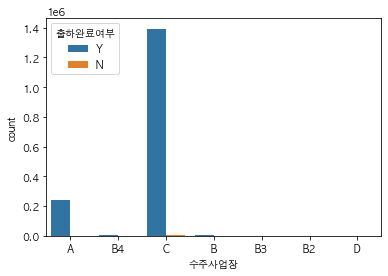

In [367]:
sns.countplot(x='수주사업장',hue='출하완료여부',data = book_raw) #원천 데이터

<AxesSubplot:xlabel='수주사업장', ylabel='count'>

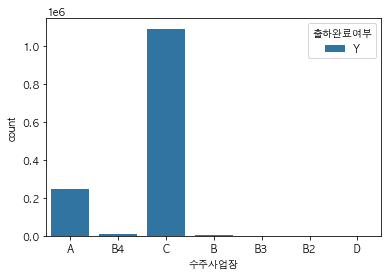

In [369]:
sns.countplot(x='수주사업장',hue='출하완료여부',data = book_new) #lead time 데이터

**리드타임과 출하완료여부의 가장 큰 중요 영향인차는 수주사업장**

---------

## 리드타임 상한선 : 30

전체 출하 데이터에서 리드타임이 가장 큰 품목을 찾아서 제어 

In [373]:
blead = book_new.merge(prod,on='수주품목코드')

In [374]:
def func1(row):
    if pd.isnull(row):
        return row
    
    if '소스' in row:
        return 'sauce'
    elif '드레싱' in row :
        return 'sauce'
    elif '마요' in row :
        return 'sauce'
    elif '밥' in row :
        return 'rice'
    elif '비빔밥' in row :
        return 'rice'
    elif '볶음밥' in row :
        return 'rice'
    elif '도시락' in row:
        return '도시락'
    elif '샐러드' in row:
        return 'salad'
    elif '베이스' in row:
        return 'soup'
    elif '국물' in row:
        return 'soup'
    elif '양념' in row:
        return 'sauce'
    elif '허브' in row:
        return 'sauce'
    elif '디핑' in row:
        return 'sauce'  
    elif '이마트 야채케' in row:
        return 'sauce'  
    elif '케찹' in row:
        return 'sauce'
    elif '참치액' in row:
        return 'sauce'  
    elif '시럽' in row:
        return 'sauce'  
    elif '머스타드' in row:
        return 'sauce'  
    elif '에이드' in row:
        return 'drink'
    elif '머스타드' in row:
        return 'sauce'
    elif '요리당' in row:
        return 'sauce'
    elif '멸치' in row:
        return 'soup'
    elif '감자무스' in row:
        return 'salad'
    elif '머스타드' in row:
        return 'sauce'
    elif '사골' in row:
        return 'soup'
    elif '사이다' in row:
        return 'drink'
    elif '쉐프메이드' in row:
        return 'sauce'
    elif '사골' in row:
        return 'soup'
    elif '사우전아일랜드' in row:
        return 'sauce'
    elif '데미그라스' in row:
        return 'sauce'
    elif '육수' in row:
        return 'soup'
    elif 'SAUCE' in row:
        return 'sauce'
    elif '다시' in row:
        return 'soup'
    elif '수프' in row:
        return 'soup'
    elif '초고추장' in row:
        return 'sauce'
    elif '리조또' in row:
        return 'rice'
    elif '깔라만시' in row:
        return 'sauce'
    elif '케첩' in row:
        return 'sauce'
    elif '죽' in row:
        return 'soup'
    elif '데리야끼' in row:
        return 'sauce'
    
blead['구분'] = bmerge['품목명'].apply(func1)

In [375]:
blead_month = blead[blead['Lead time'] <= 30]

## 각 품목명별 평균 리드타임 정렬

In [376]:
book_lead_month_group_name = blead_month.groupby('품목명')['Lead time'].mean()
book_lead_month_group_name = pd.DataFrame(book_lead_month_group_name).reset_index()
book_lead_month_group_name.sort_values(by=['Lead time'],ascending=False,inplace=True)
book_lead_month_group_name

,품목명,Lead time
96,G-price마요네즈500g,29.000000
994,쿠마이쉬림프후라이드라이스2kg,22.200000
300,디프라이스마요네즈-1 1kg,22.076923
995,쿠마이악토퍼스후라이드라이스2kg,21.750000
301,디프라이스마요네즈500g,21.500000
...,...,...
276,닭강정소스T,0.000000
38,(연결링)(20년)아몬드&호두드레싱-N495g*2ea,0.000000
894,정성담은토마토케찹595g (1),0.000000
341,마요네즈1kg튜브(니혼푸드),0.000000


In [379]:
blead[blead['품목명'] == 'G-price마요네즈500g']

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,Lead time,Year1,Year2,품목명,구분
868146,C,2012-03-07,34,IJ9205,16B06068,NaN,20500,1400.0,57400000.0,0,Y,2012-05-25,79.0,2012.0,2012,G-price마요네즈500g,sauce
868147,C,2012-03-07,257,IJ9205,16B06068,NaN,20500,1400.0,57400000.0,0,Y,2012-06-22,107.0,2012.0,2012,G-price마요네즈500g,sauce
868148,C,2012-11-22,44,IJ9205,16B06068,NaN,20500,2800.0,57400000.0,0,Y,2012-12-21,29.0,2012.0,2012,G-price마요네즈500g,sauce


## 수주사업장별 평균리드타임

In [382]:
book_lead_month_group_work = blead_month.groupby('수주사업장')['Lead time'].mean()
book_lead_month_group_work = pd.DataFrame(book_lead_month_group_work).reset_index()
book_lead_month_group_work.sort_values(by=['Lead time'],ascending=False,inplace=True)
book_lead_month_group_work

,수주사업장,Lead time
3,C,1.515963
2,B4,1.421053
0,A,1.127071
1,B3,1.000000
4,D,1.000000


수주사업장 C가 평균리드타임이 가장 길다

## 품목명(코드)별 평균리드타임, 수주수량 관계

In [384]:
book_lead_month_group_code = blead_month.groupby('수주품목코드')['Lead time'].mean()
book_lead_month_group_code = pd.DataFrame(book_lead_month_group_code).reset_index()
book_lead_month_group_code.sort_values(by=['Lead time'],ascending=False,inplace=True)
book_lead_month_group_code

,수주품목코드,Lead time
767,16B06068,29.000000
823,1BA03025,22.200000
755,16B06028,22.076923
824,1BA03026,21.750000
763,16B06058,21.500000
...,...,...
410,13G02073,0.000000
1110,1BA03627,0.000000
593,13R13033,0.000000
1089,1BA03563,0.000000


In [388]:
book_lead_month_group_code[book_lead_month_group_code['수주품목코드']=='16A01062']

,수주품목코드,Lead time
678,16A01062,1.017018


In [389]:
book_lead_month_group_code_top=book_lead_month_group_code[book_lead_month_group_code['Lead time']>10]
book_lead_month_group_code_top
book_lead_month_group_code_top_code=book_lead_month_group_code_top['수주품목코드']
book_lead_month_group_code_top_code

767    16B06068
823    1BA03025
755    16B06028
824    1BA03026
763    16B06058
         ...   
610    13S01339
74     13A00608
607    13S01335
550    13R09016
606    13S01334
Name: 수주품목코드, Length: 61, dtype: object

## 각 품목별 평균 수주수량KG

In [391]:
book_lead_month_group_kg = blead_month.groupby('수주품목코드')['수주수량KG'].mean()
book_lead_month_group_kg = pd.DataFrame(book_lead_month_group_kg).reset_index()
book_lead_month_group_kg.sort_values(by=['수주수량KG'],ascending=False,inplace=True)
book_lead_month_group_kg

,수주품목코드,수주수량KG
767,16B06068,20500.000000
763,16B06058,20083.333333
757,16B06031,18162.666667
755,16B06028,16500.000000
627,13S01409,15486.500000
...,...,...
260,13D02103,-69.627193
215,13D01203,-78.274435
600,13S01303,-108.971776
183,13C01036,-109.668644


<AxesSubplot:xlabel='Lead time', ylabel='수주수량KG'>

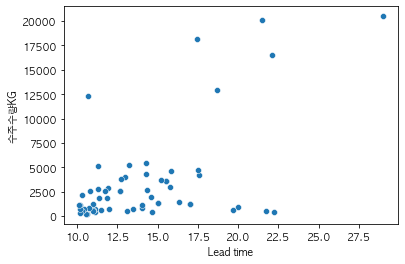

In [392]:
suzu_kg=book_lead_month_group_code_top.merge(book_lead_month_group_kg,on = '수주품목코드',how ='inner')
sns.scatterplot(x='Lead time',y='수주수량KG',data = suzu_kg)